In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 20,20
from sklearn.model_selection import cross_validate

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns', 100)

**1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious).**

In [3]:
allData = pd.read_csv('data_breast.csv')

**Переведем целевую переменную в тип integer (где 0 - это злокачественная опухоль, а 1 - доброкачественная).**

In [4]:
allData['diagnosis'] = (allData['diagnosis'] == 'B').astype(int)

In [5]:
allData[['id', 'diagnosis']].groupby('diagnosis').count()

,id
diagnosis,
0,212
1,357


In [6]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null int32
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

**Видно, что данные уже чистые, так как отсутствуют пропущенные значения. Также у нас отсутствуют категориальные параметры, так что мы можем уже обучать модель на имеющихся данных.**

In [7]:
allData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


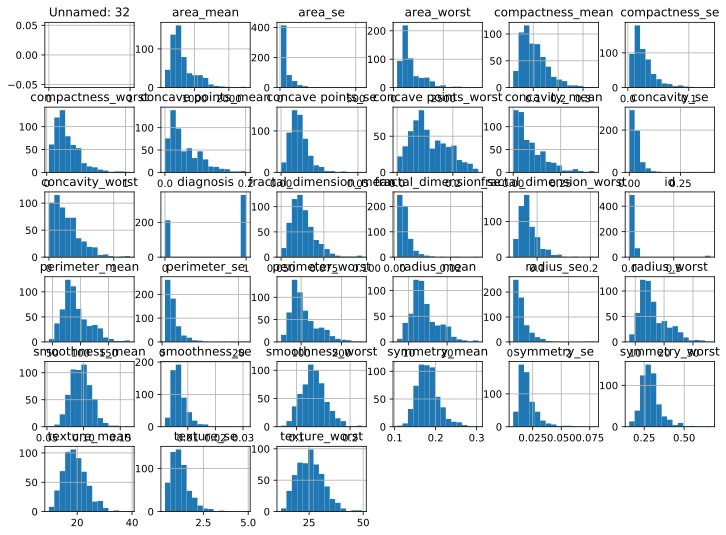

In [8]:
rcParams['figure.figsize'] = 12,9
hist = allData.hist(bins=15)

**Можно видеть, что многие параметры распределены по нормальному закону, например, texture_mean и texture_worst.**

In [9]:
from scipy import stats

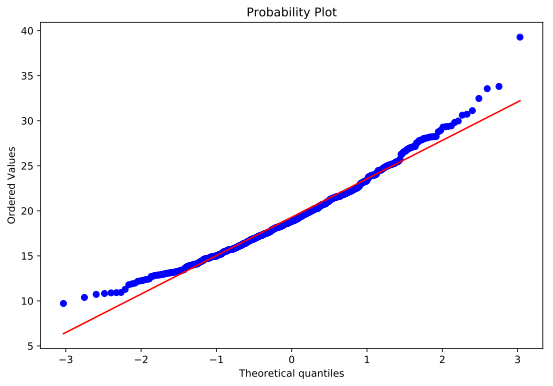

In [10]:
rcParams['figure.figsize'] = 9,6
res = stats.probplot(allData['texture_mean'], plot=plt, dist='norm')

**В свою очередь, например, параметр area_se будет распределено по экспоненциальному закону.**

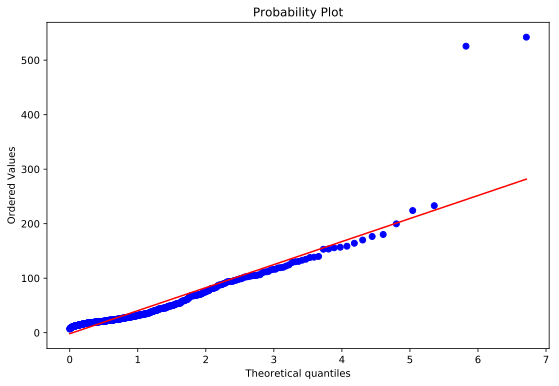

In [11]:
res = stats.probplot(allData['area_se'], plot=plt, dist='expon')

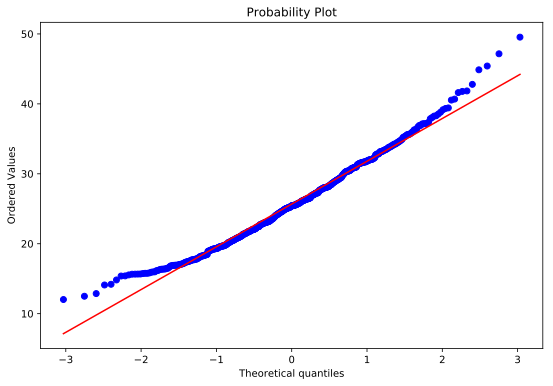

In [12]:
res = stats.probplot(allData['texture_worst'], plot=plt, dist='norm')

**2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).**

Для того, что рассчитать основные статистики можно использовать метод describe(). 

In [13]:
allData.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Для поиска моды воскользуемся методом 

In [14]:
allData.mode().head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8670,1.0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,0.2204,0.8561,1.778,16.64,0.005080,0.01104,0.0,0.0,0.01344,0.001784,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN
1,8913,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,0.2860,1.1500,NaN,16.97,0.005251,0.01812,NaN,NaN,NaN,0.001892,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,8915,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,NaN,1.2680,NaN,17.67,0.005298,0.02310,NaN,NaN,NaN,0.001906,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,9047,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,NaN,1.3500,NaN,18.54,0.005518,NaN,NaN,NaN,NaN,0.001956,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,85715,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,NaN,NaN,NaN,NaN,0.005884,NaN,NaN,NaN,NaN,0.001971,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN


Видно, что большинство параметров не имеет моды, так как все они разпределены достаточно непрерывно.

**3. Выбрать стратегию для работы с пропущенными значениями.**

Можно заметить, что пропущенные значения отсутствуют в основных колонках, все пропущенные значения собраны в колонку "Unnamed", которую мы смело удалим.

**4. Рассчитать и визуализировать корреляционную матрицу для переменных.**

Переменных огромное множество, поэтому придется увеличить размер матрицы.

Саму матрицу получим с помощью метода соrr().

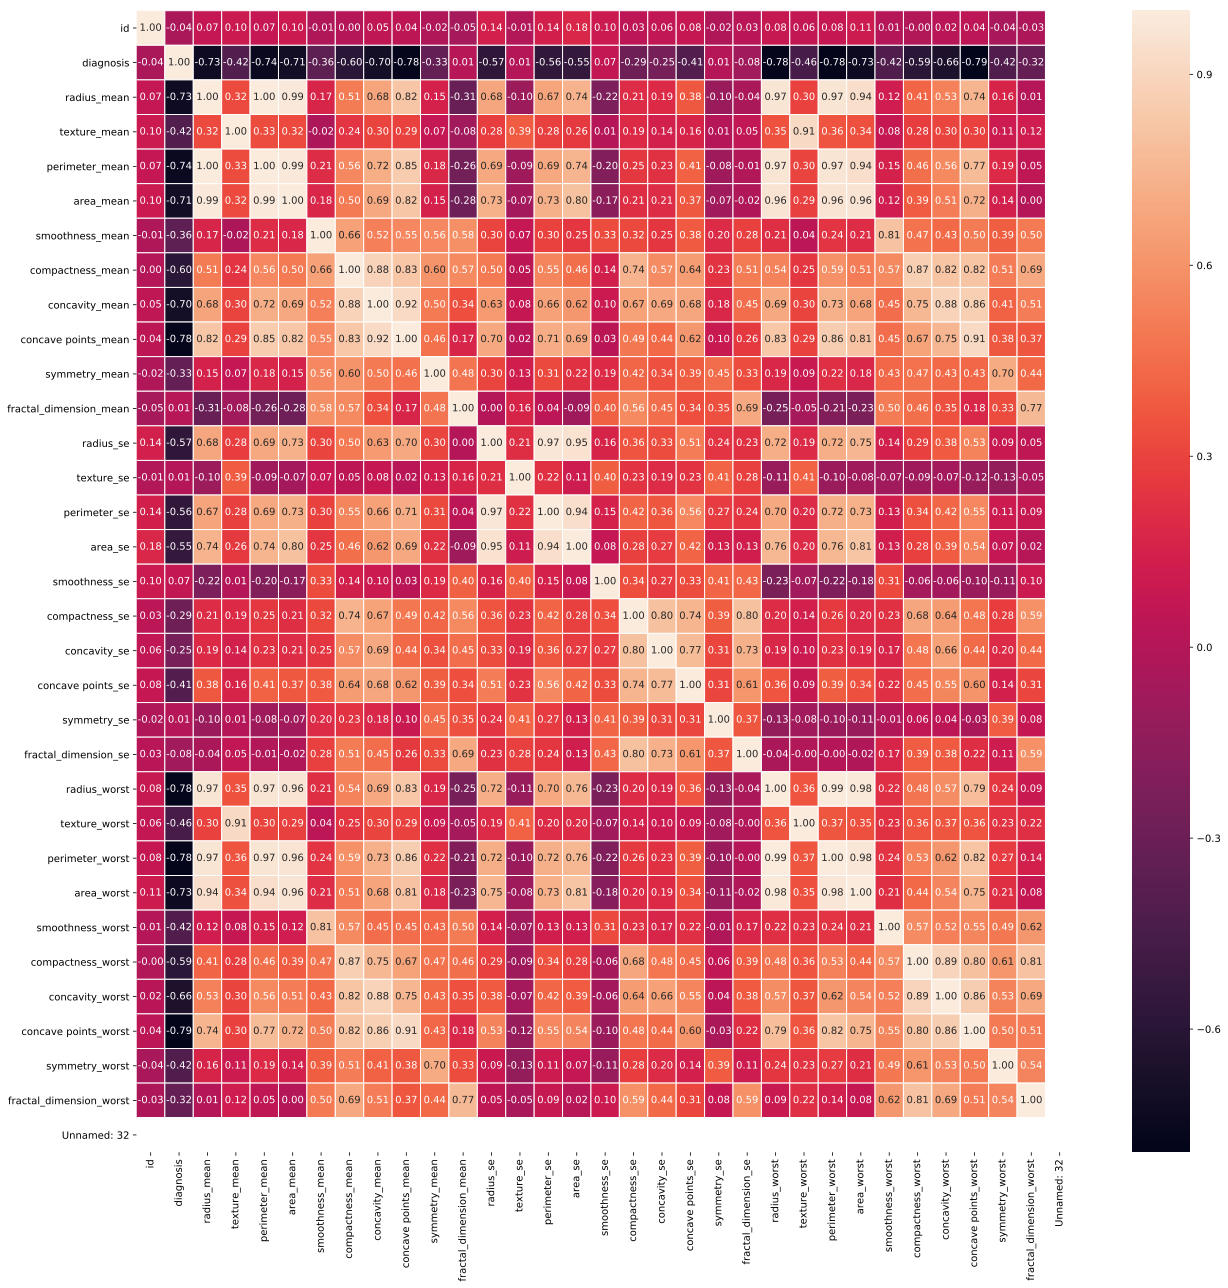

In [15]:
rcParams['figure.figsize'] = 21,21
corr = allData.corr()
sns.heatmap(allData.corr(), annot=True, fmt=".2f", 
             linewidths=1)

Можно заметить, что почти все параметры имеют серьезную отрицательную корреляцию с целевой переменной, что может говорить о том, что их увеличение влечет за собой повышение шанса на исход со злокачественной опухолью.

**5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).**

Напишем функцию, с помощью которой мы будем визуализировать различные взаимосвязи. 

In [16]:
def plot_vis(df, col, Normalized, kind, width=1, rot=30, variable='', colors=['blue', 'red']):
    
    """
    Функция принимает на вход датафрейм,
    а также колонку по которой происходит группировка. 
    Имеет переменные: 
         1) Normalized == True or False, отвечает за нормализацию данных.
         2) kind = 'bar', 'area', 'line' etc. Отвечает за тип графика. 
         3) width - int. Переменная для 'bar' графика. Отвечает за расстояние между столбцами.
         4) rot - int. Определяет угол, под которым будут расположены названия эл-ов колонок.
         5) colors - принимает на вход список цветов будущих графиков.
    На выходе возвращает датафрейм с принятой колонкой и количество элементов этой колонки
    в исходном датафрейме. А также непосредственно визуализацию.
    """
    
    data_col_1 = df[[col, variable]][df[variable]==1].groupby(col).count()
    data_col_0 = df[[col, variable]][df[variable]==0].groupby(col).count()
    data_merged = pd.merge(data_col_1, data_col_0, left_index=True, right_index=True, suffixes=('=1', '=0'), how='right')
    data_merged_clean = data_merged.fillna(0)
    
    if Normalized==True:
        data_merged_clean['sum'] = data_merged_clean[variable+'=1'] + data_merged_clean[variable+'=0']
        data_merged_clean[variable+'=1_n'] = data_merged_clean[variable+'=1']/data_merged_clean['sum']
        data_merged_clean[variable+'=0_n'] = data_merged_clean[variable+'=0']/data_merged_clean['sum']
        
        if kind=='bar':
            return data_merged_clean[[variable+'=1_n', variable+'=0_n']].\
                plot(kind=kind, stacked=True, rot=rot, color=colors, width=width, title=col+' visualization'), data_merged_clean
        else:
            return data_merged_clean[[variable+'=1_n', variable+'=0_n']].\
                plot(kind=kind, stacked=True, rot=rot, color=colors, title=col+' visualization'), data_merged_clean
    else:
        if kind=='bar':
            return data_merged_clean.plot(kind=kind, stacked=True, rot=rot, color=colors, width=width, title=col+' visualization'), data_merged_clean
        else:
            return data_merged_clean.plot(kind=kind, stacked=True, rot=rot, color=colors, title=col+' visualization'), data_merged_clean

Построим, например, гистограммы.

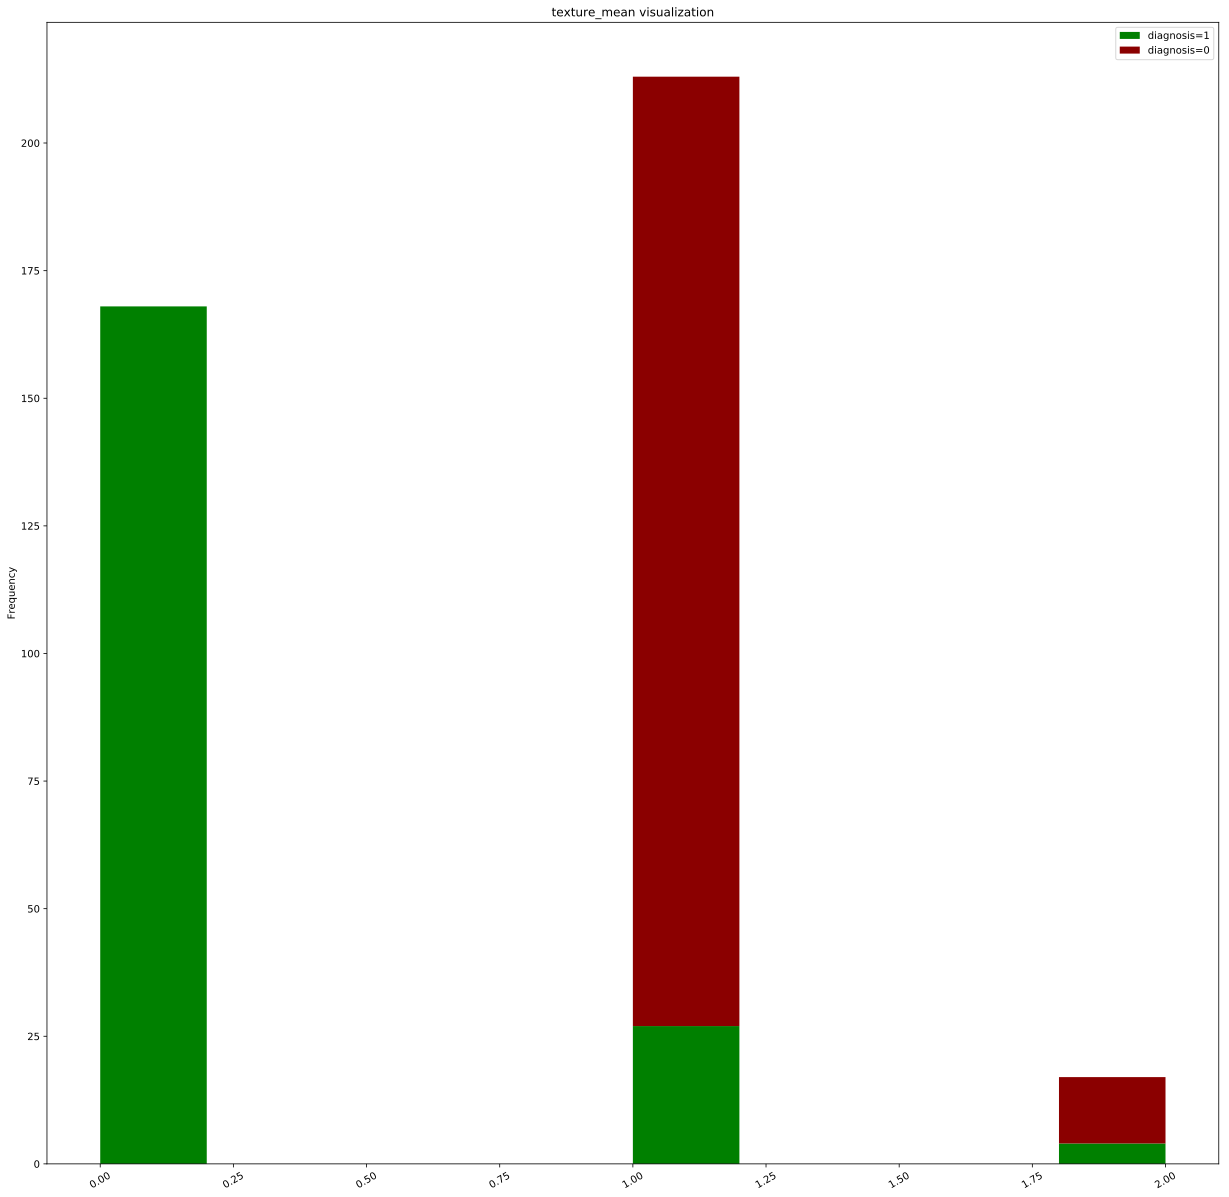

In [17]:
plot = plot_vis(allData, col='texture_mean', Normalized=False, kind='hist', variable='diagnosis', colors=['green', 'darkred'])

Видно, что с увеличением texture_mean растет вероятность злокачественной опухоли. 

Визуализируем такого рода взаимосвязи для всех наших параметров.

C:\Users\Arsenii\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


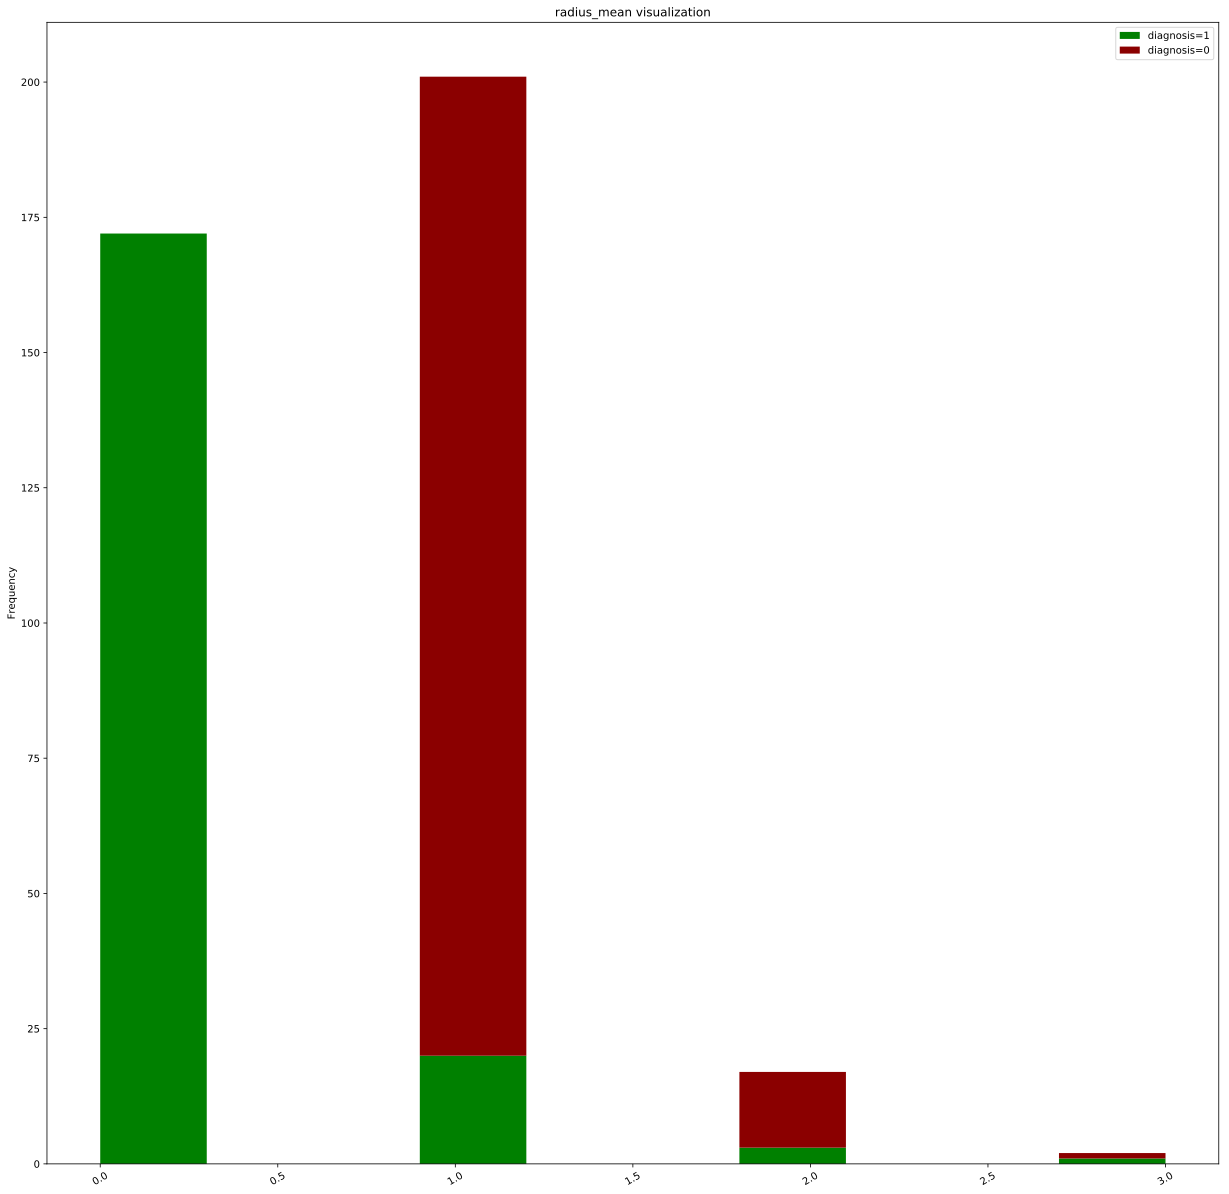

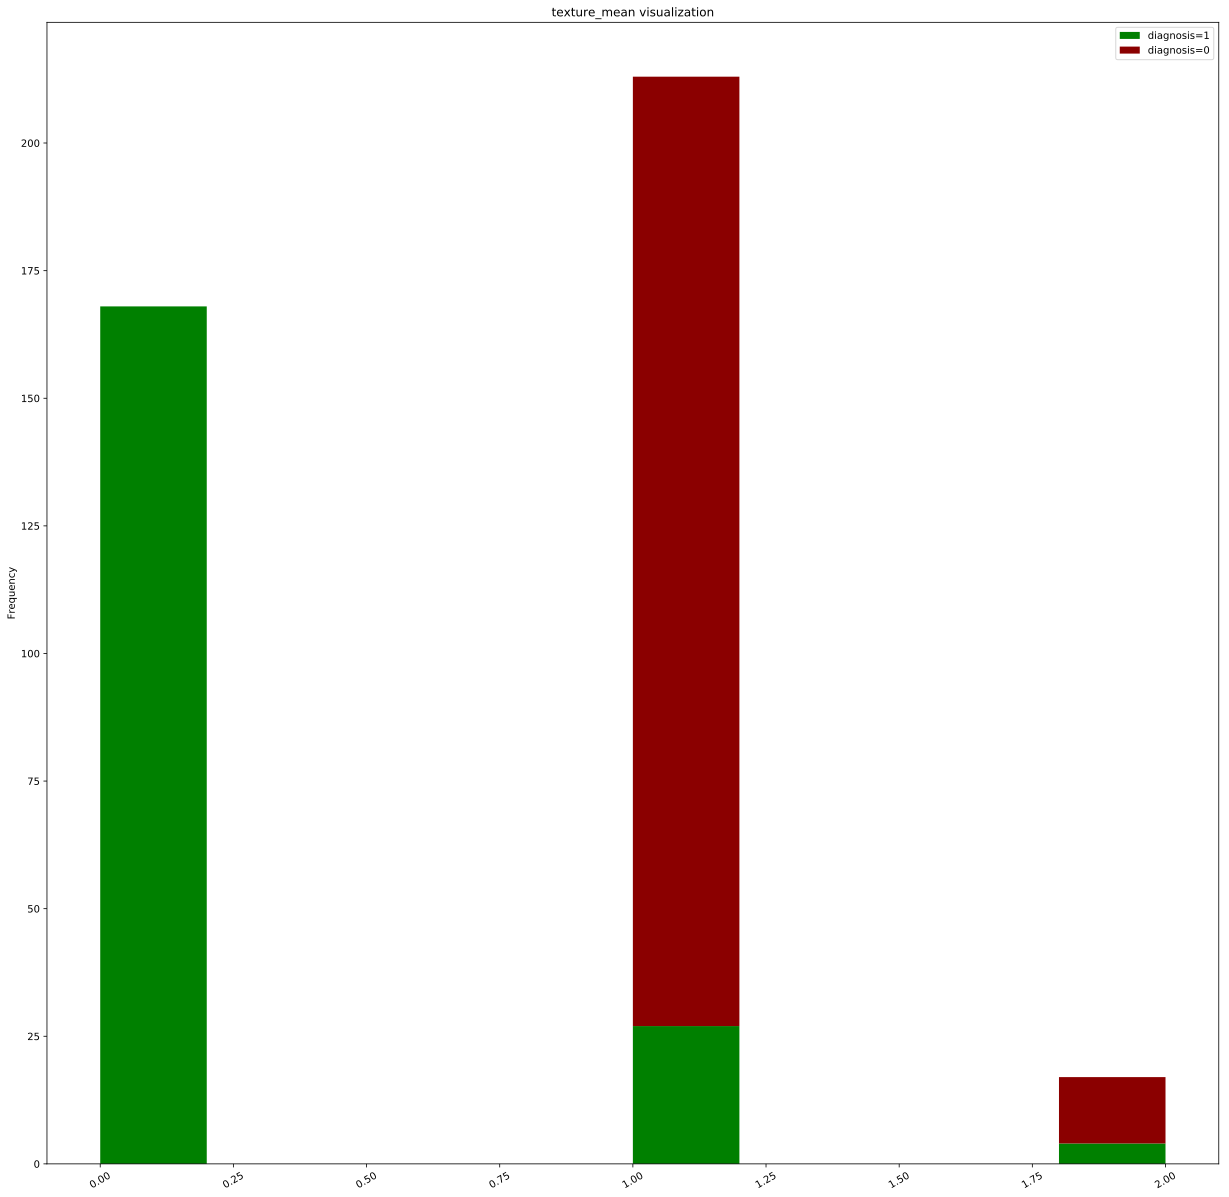

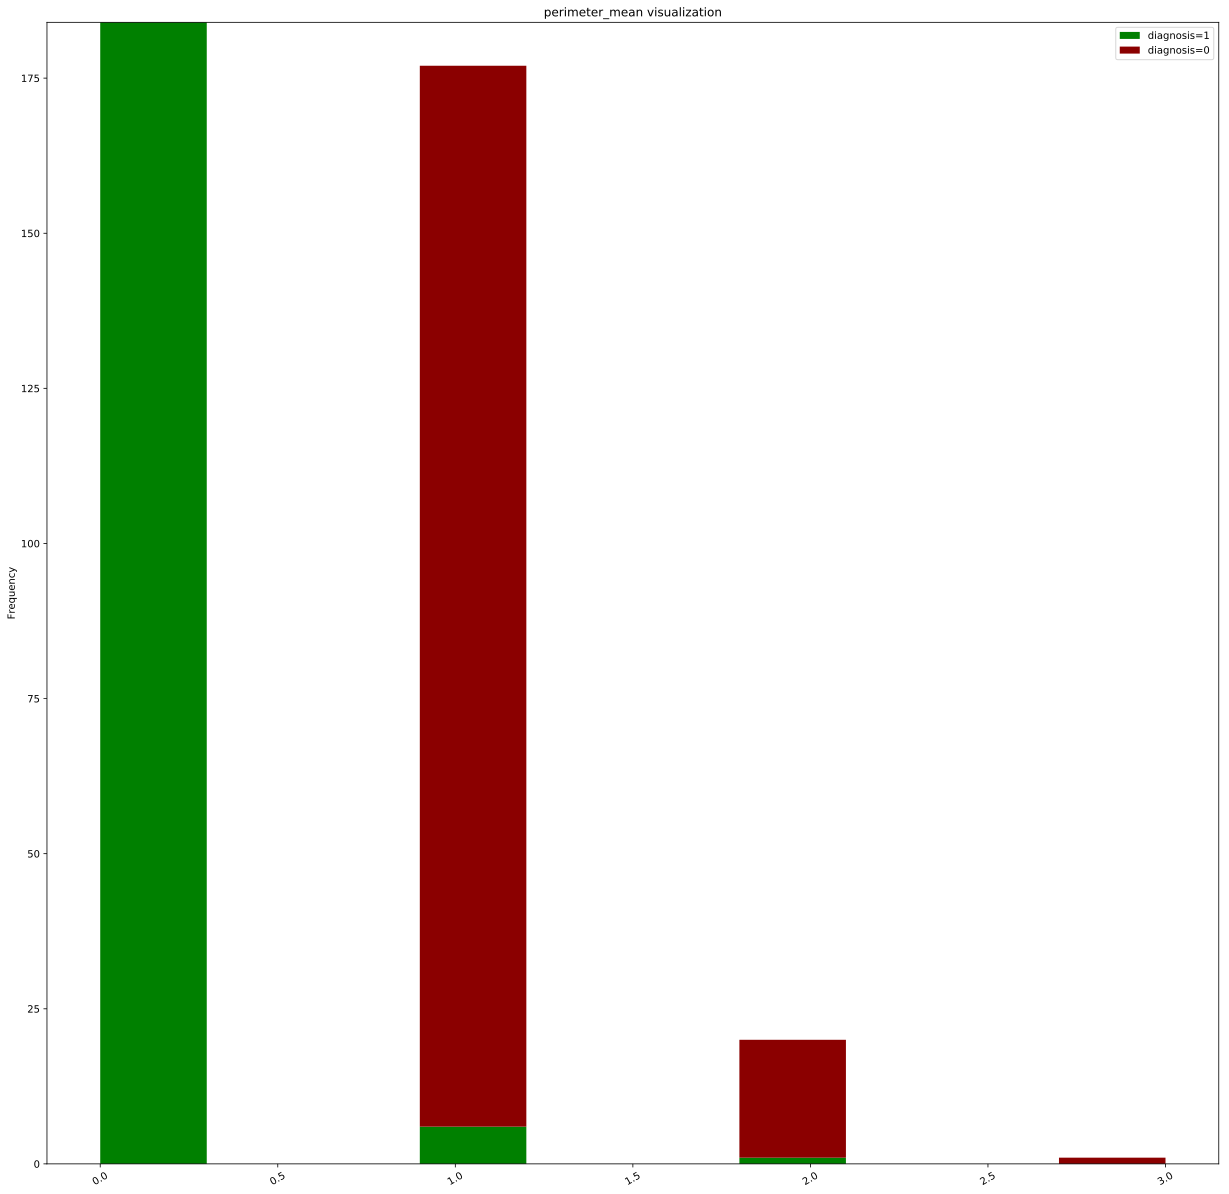

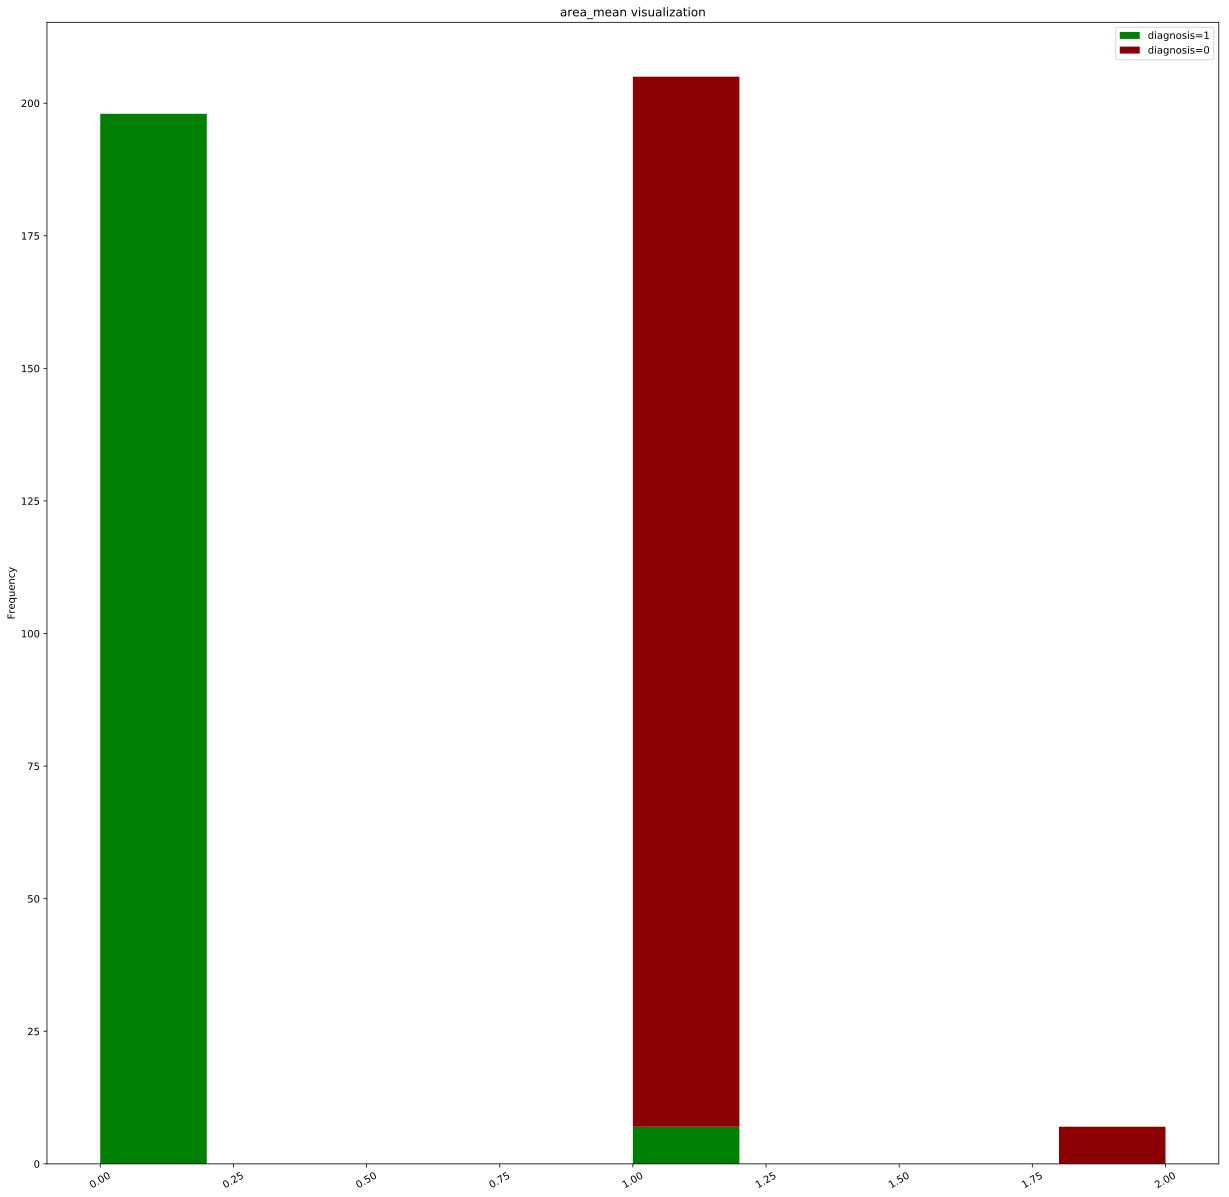

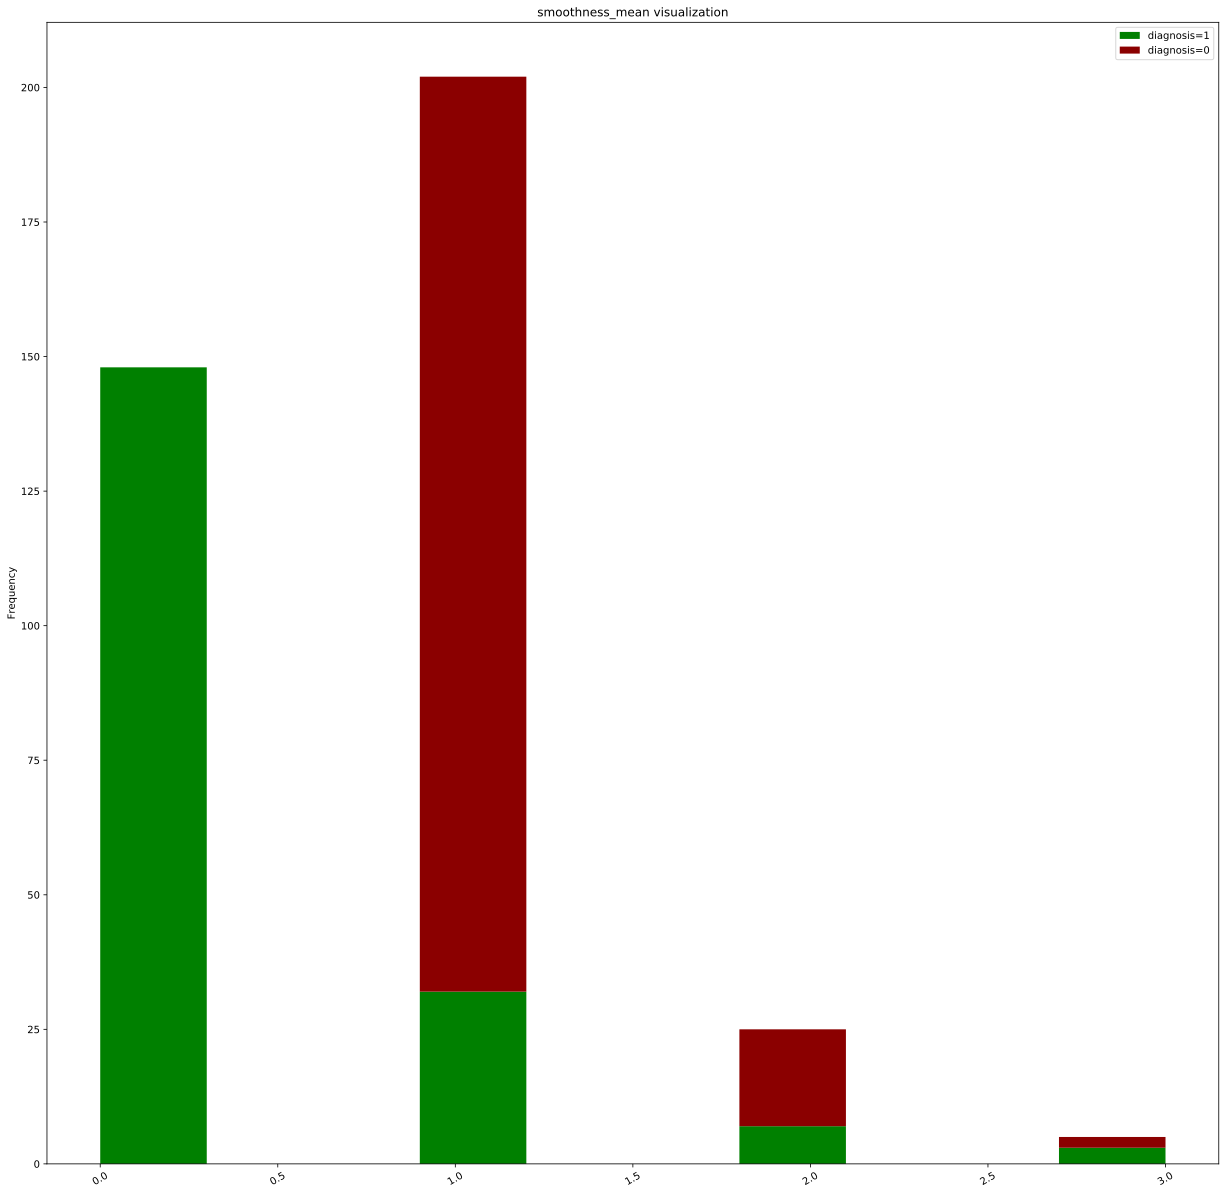

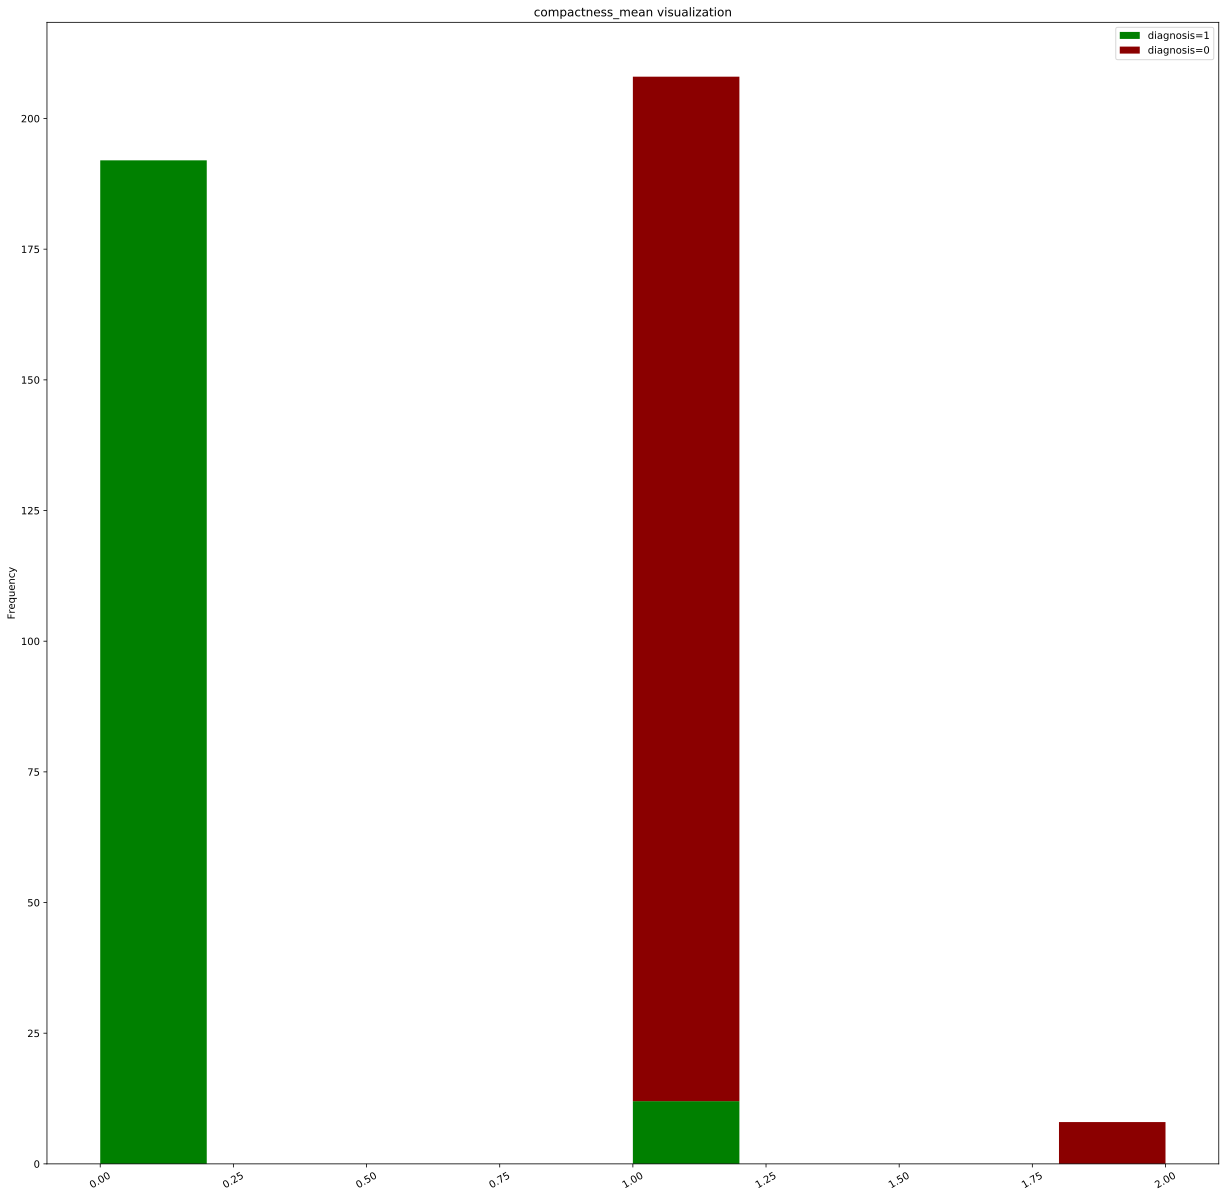

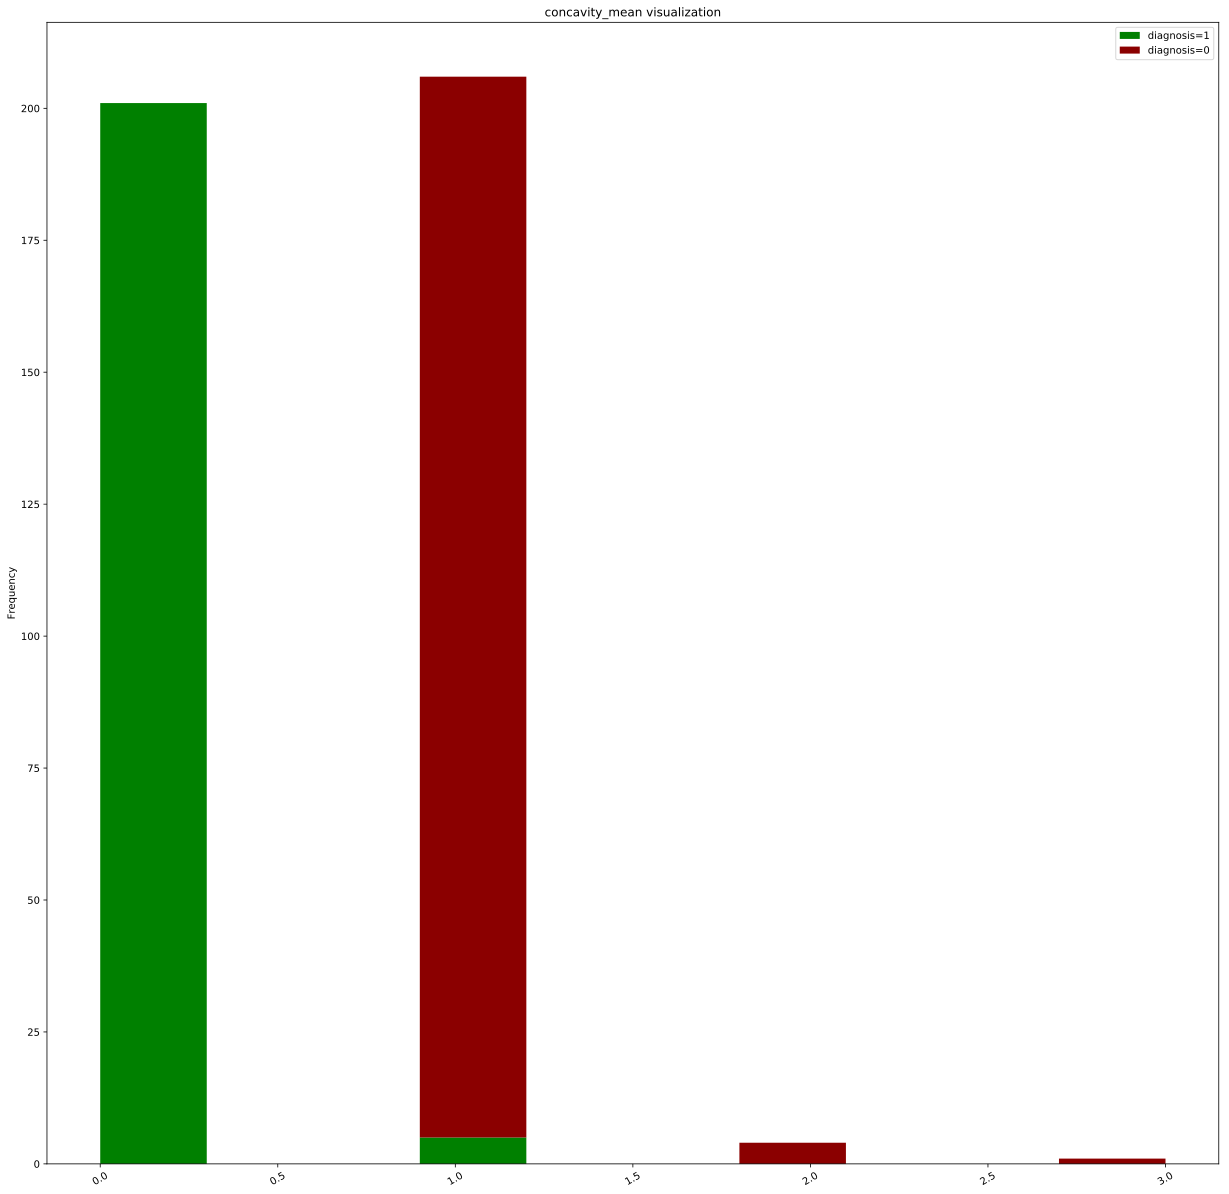

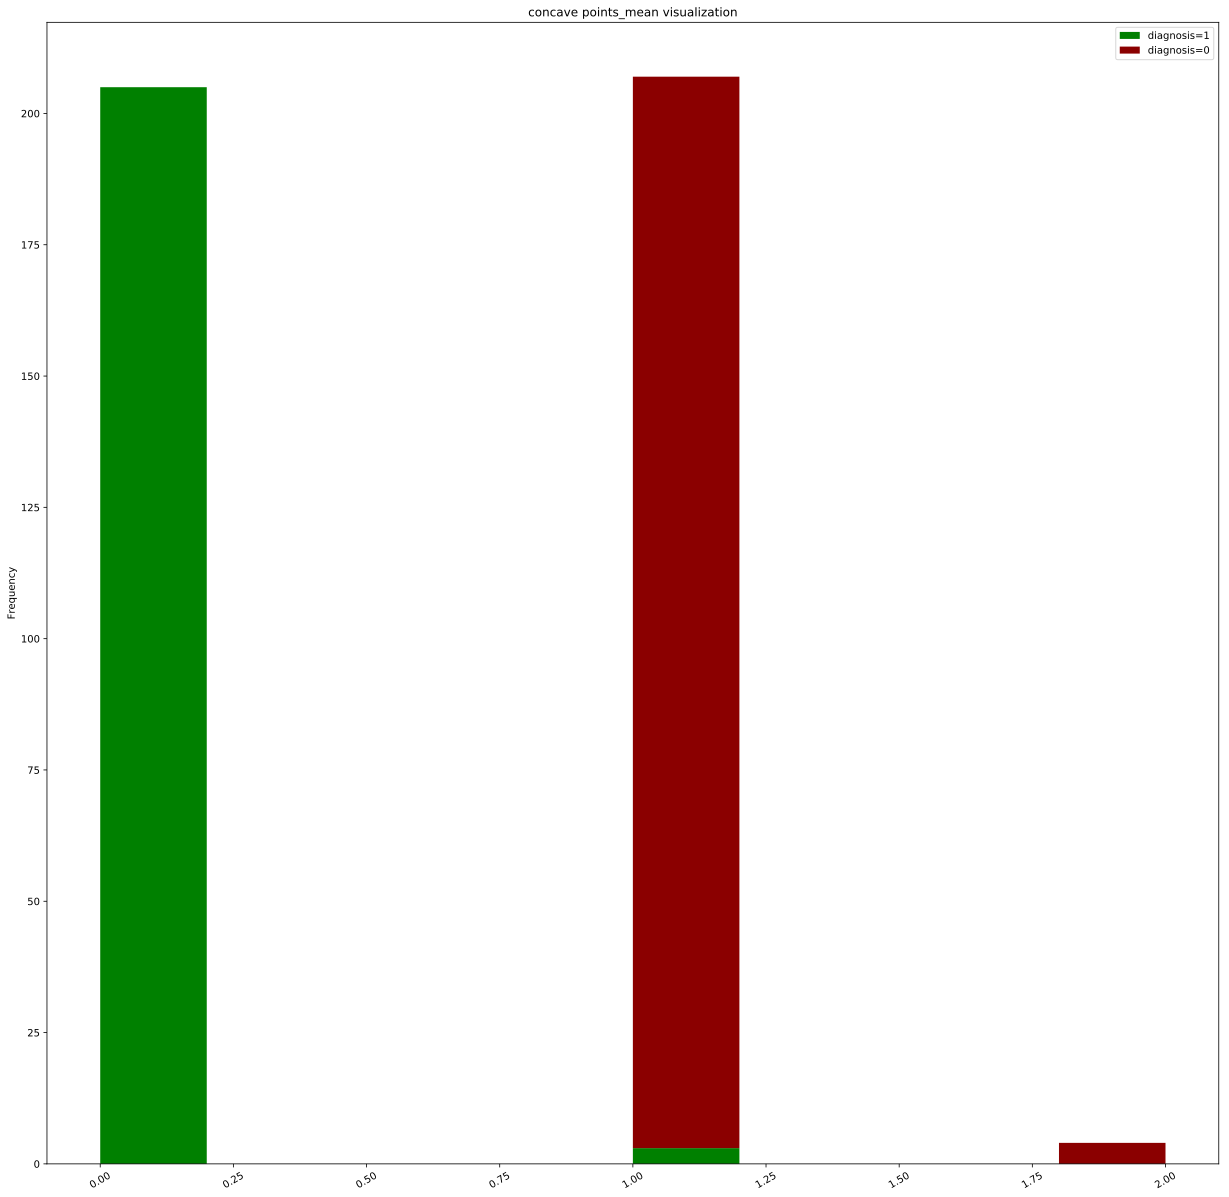

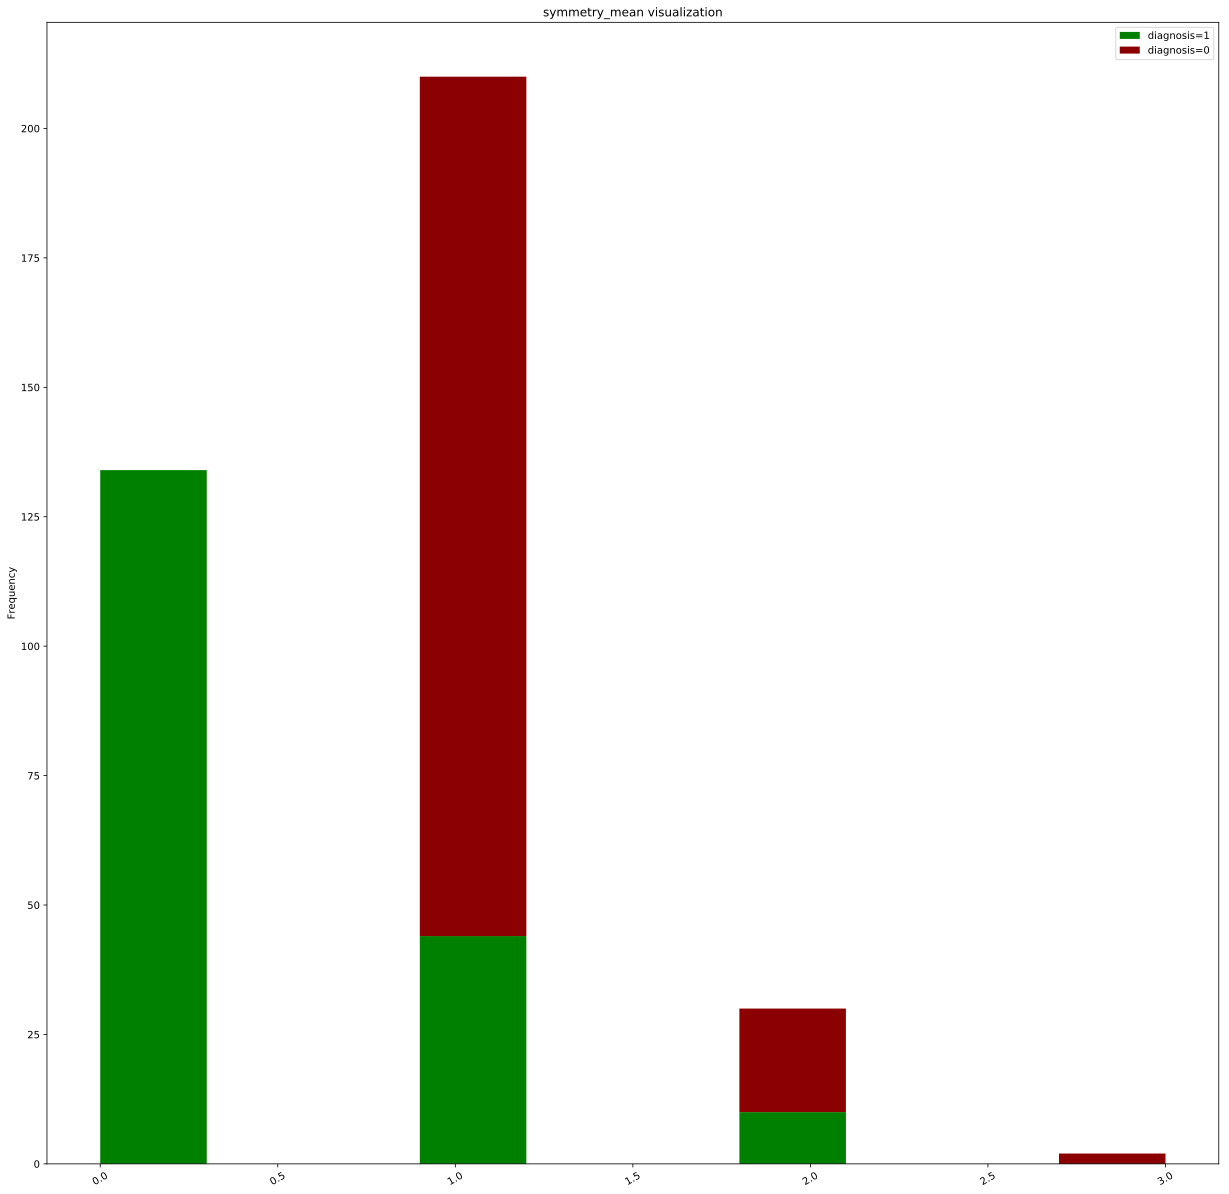

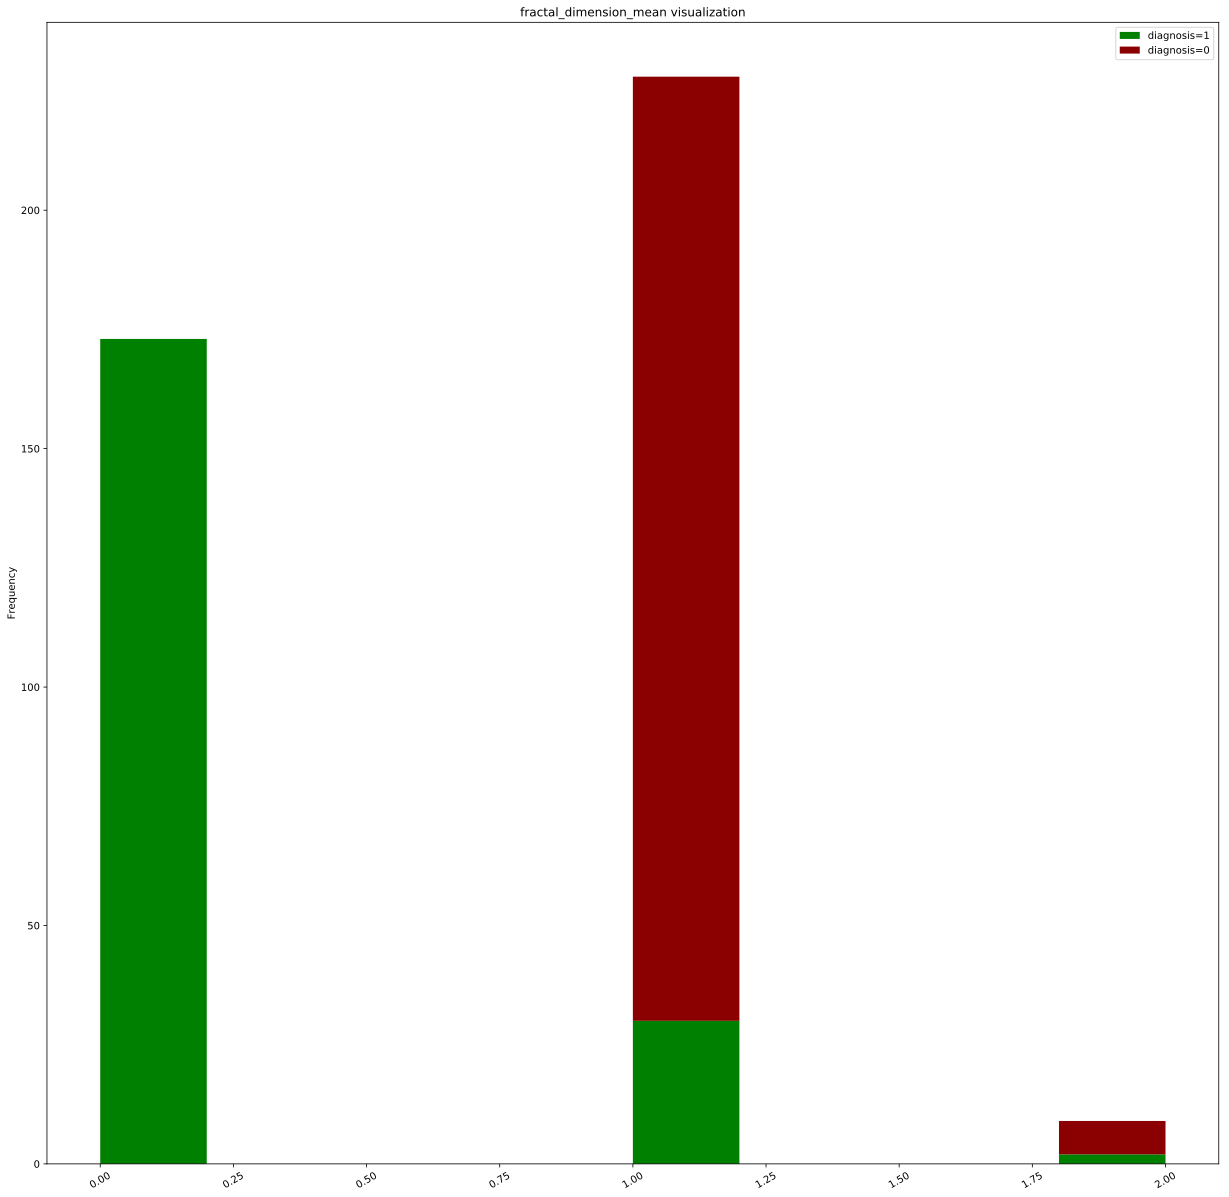

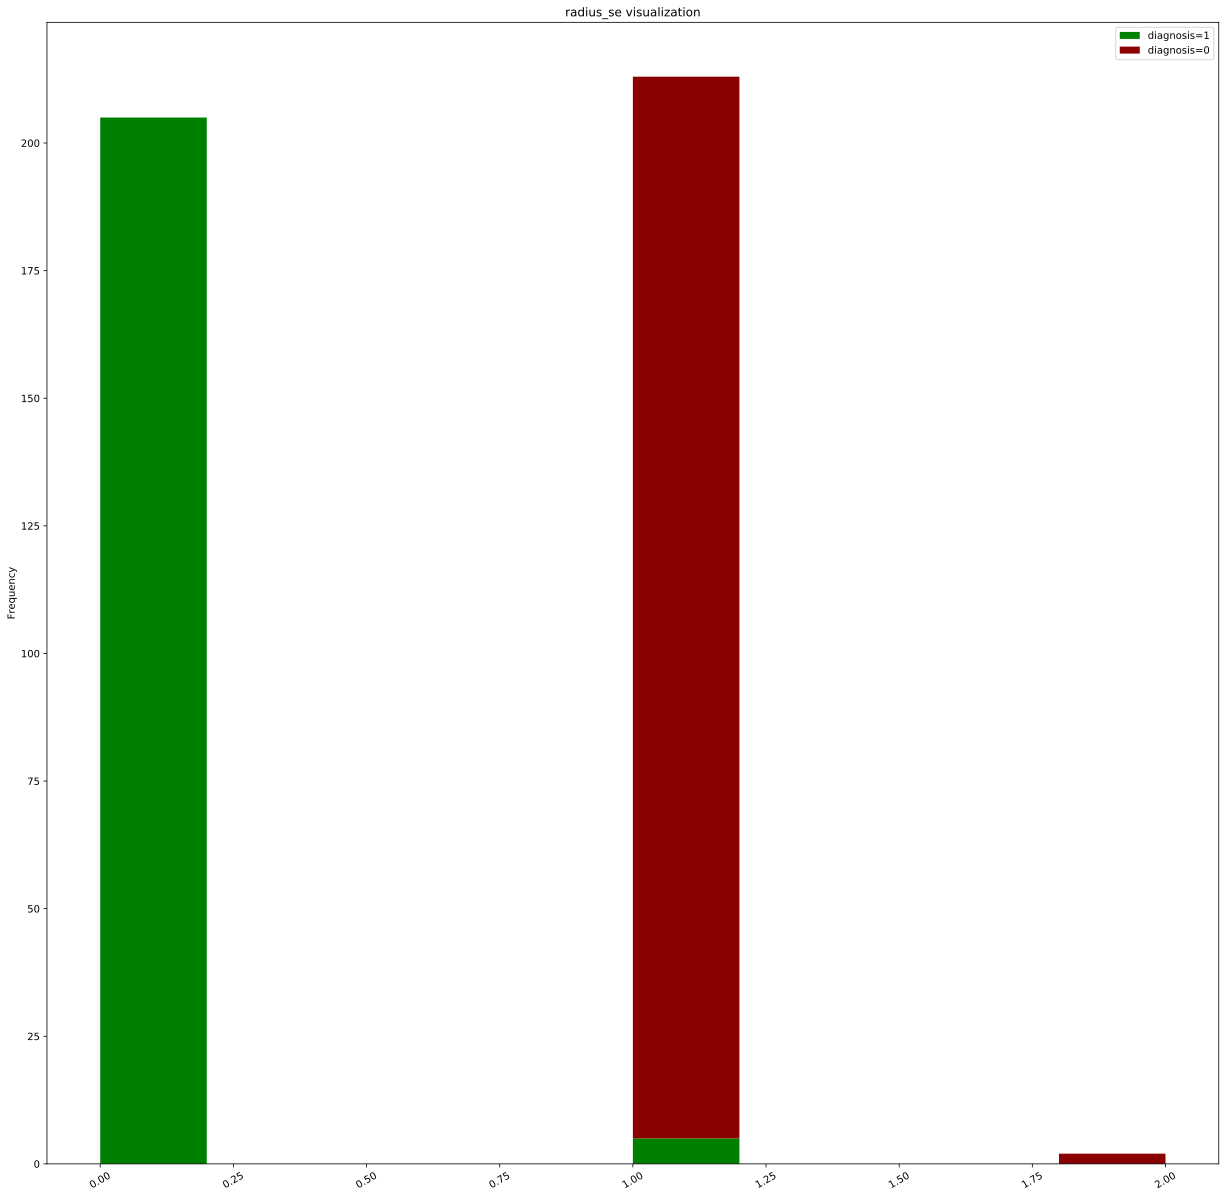

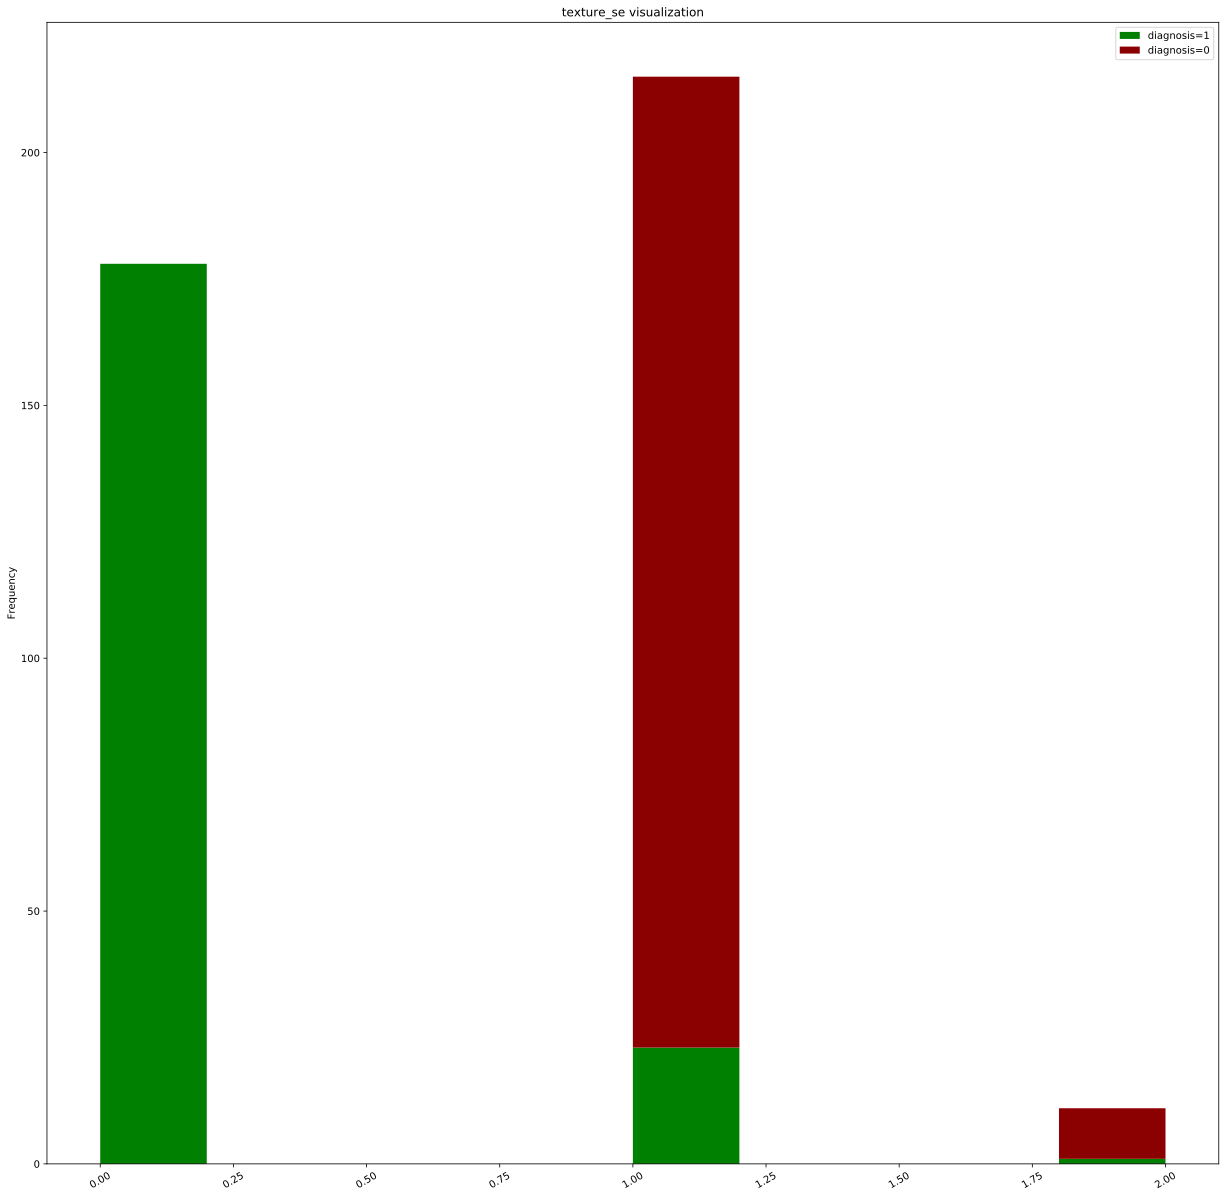

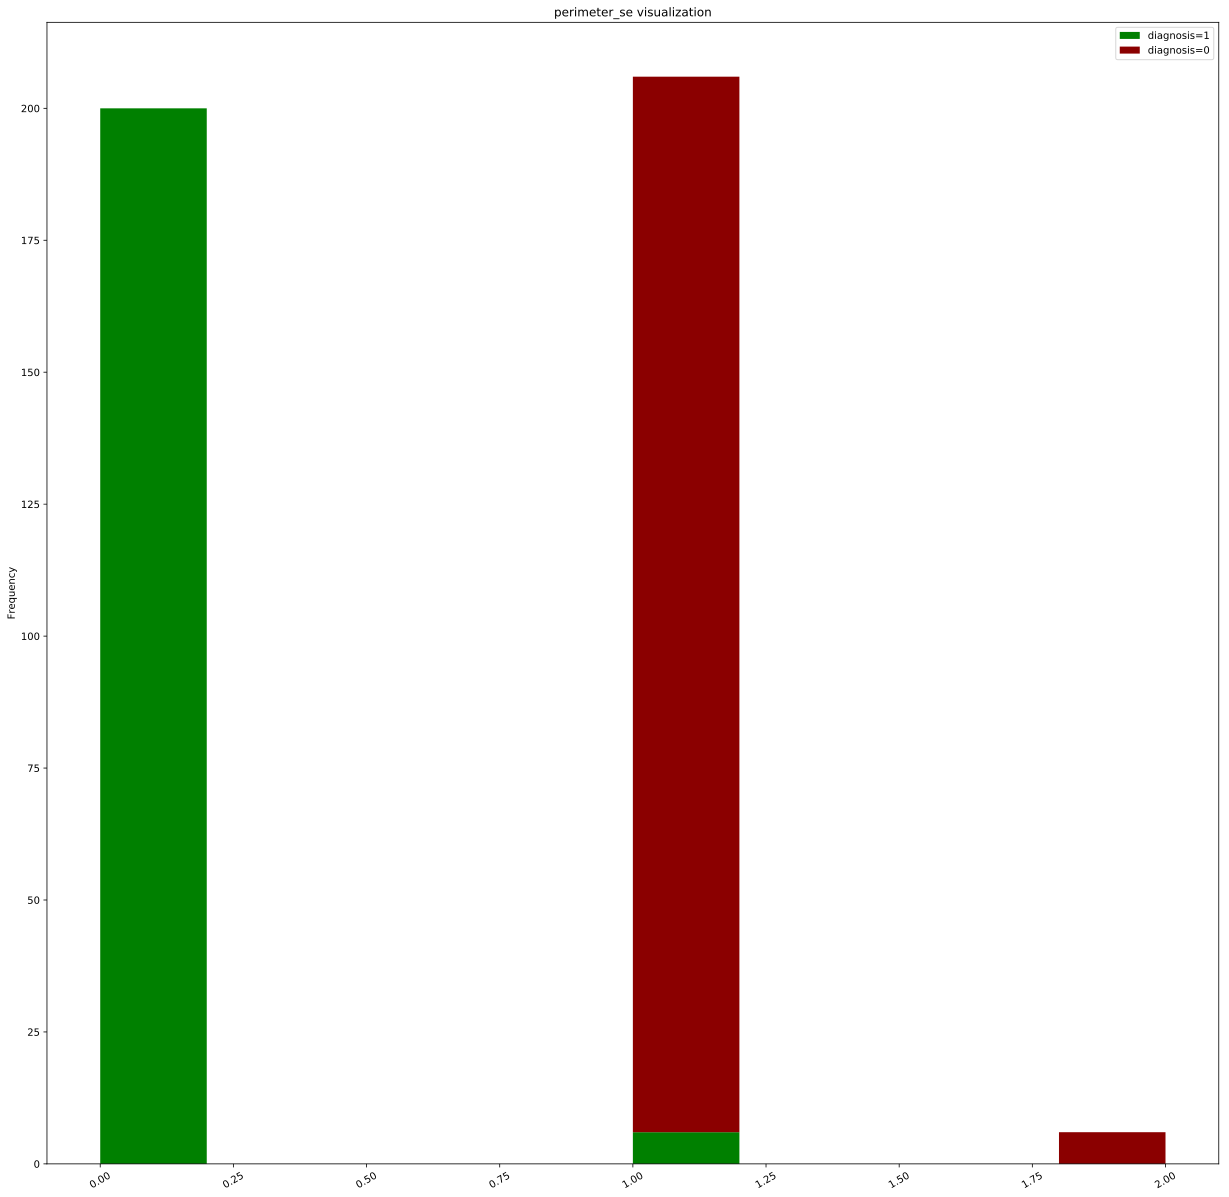

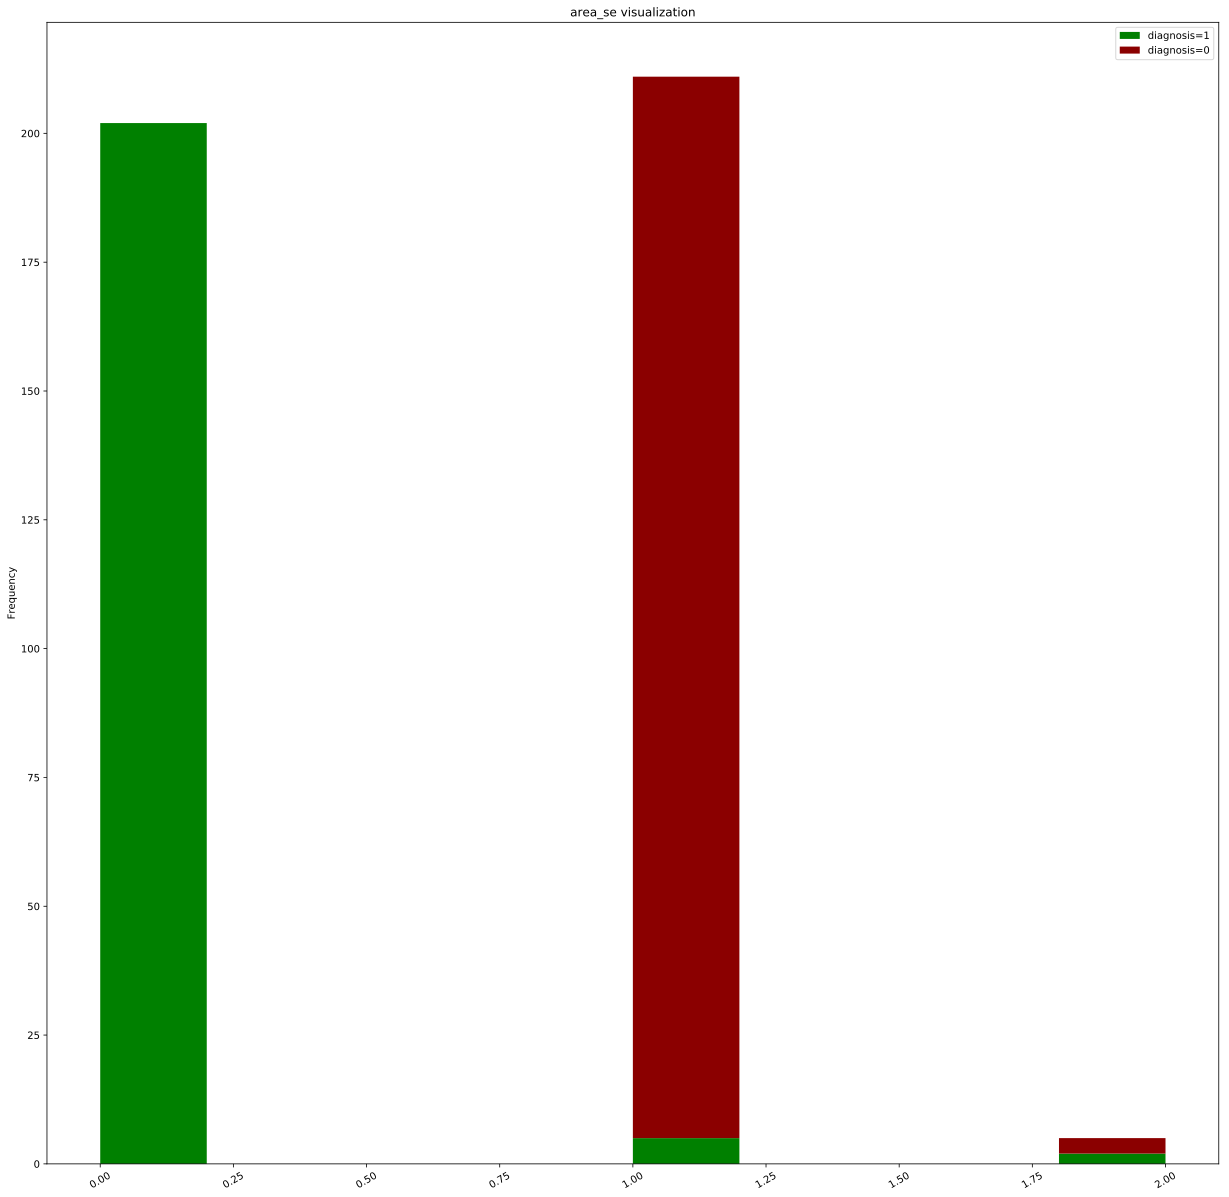

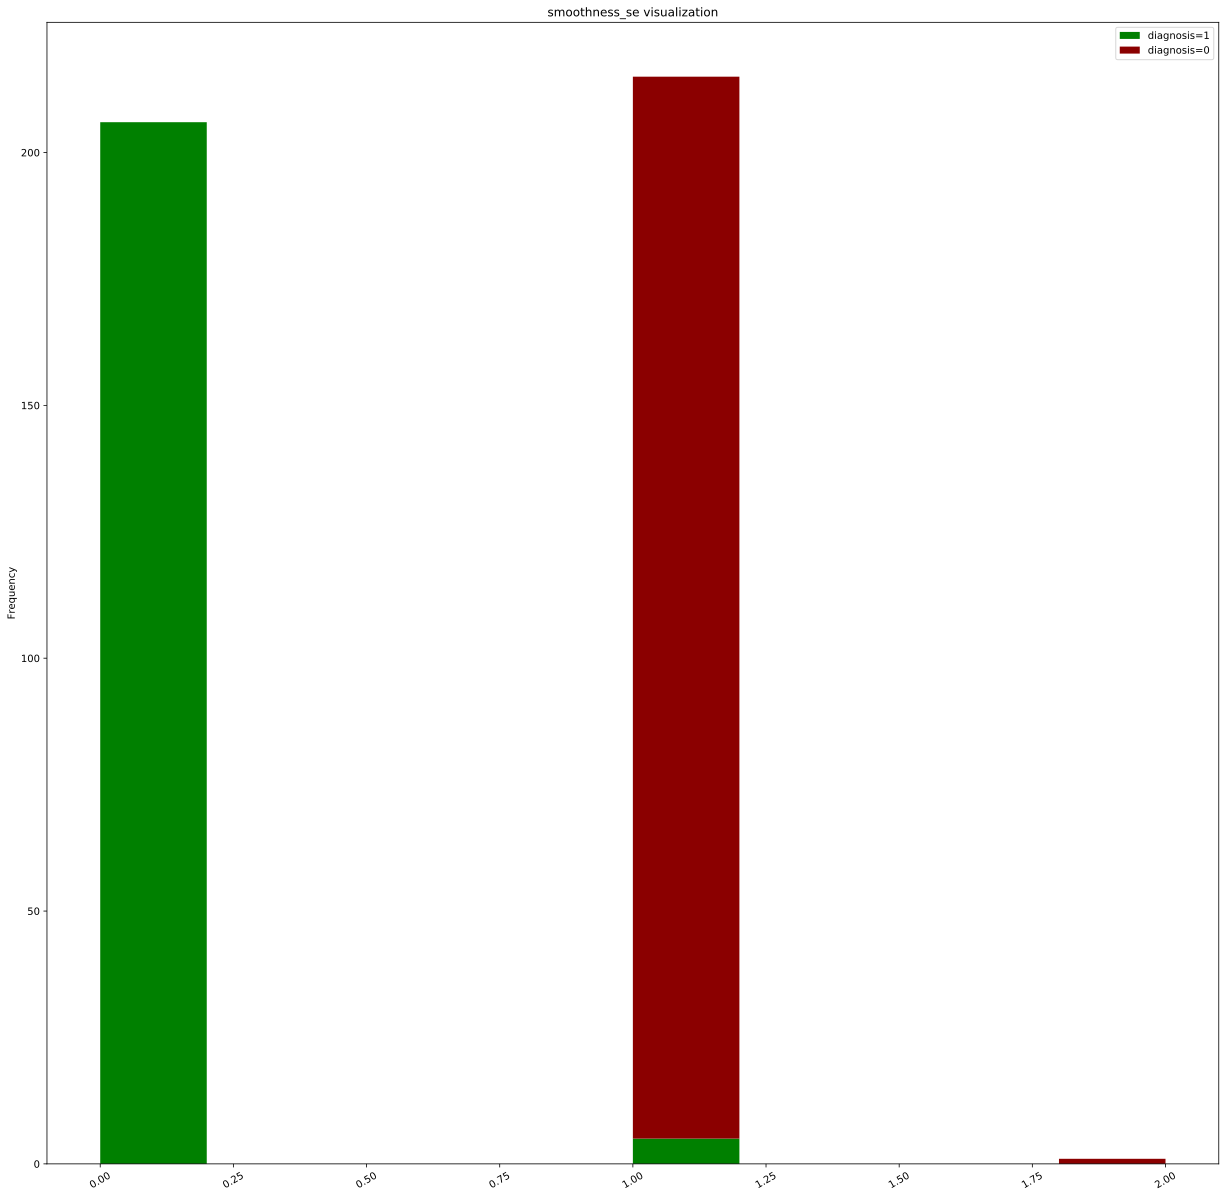

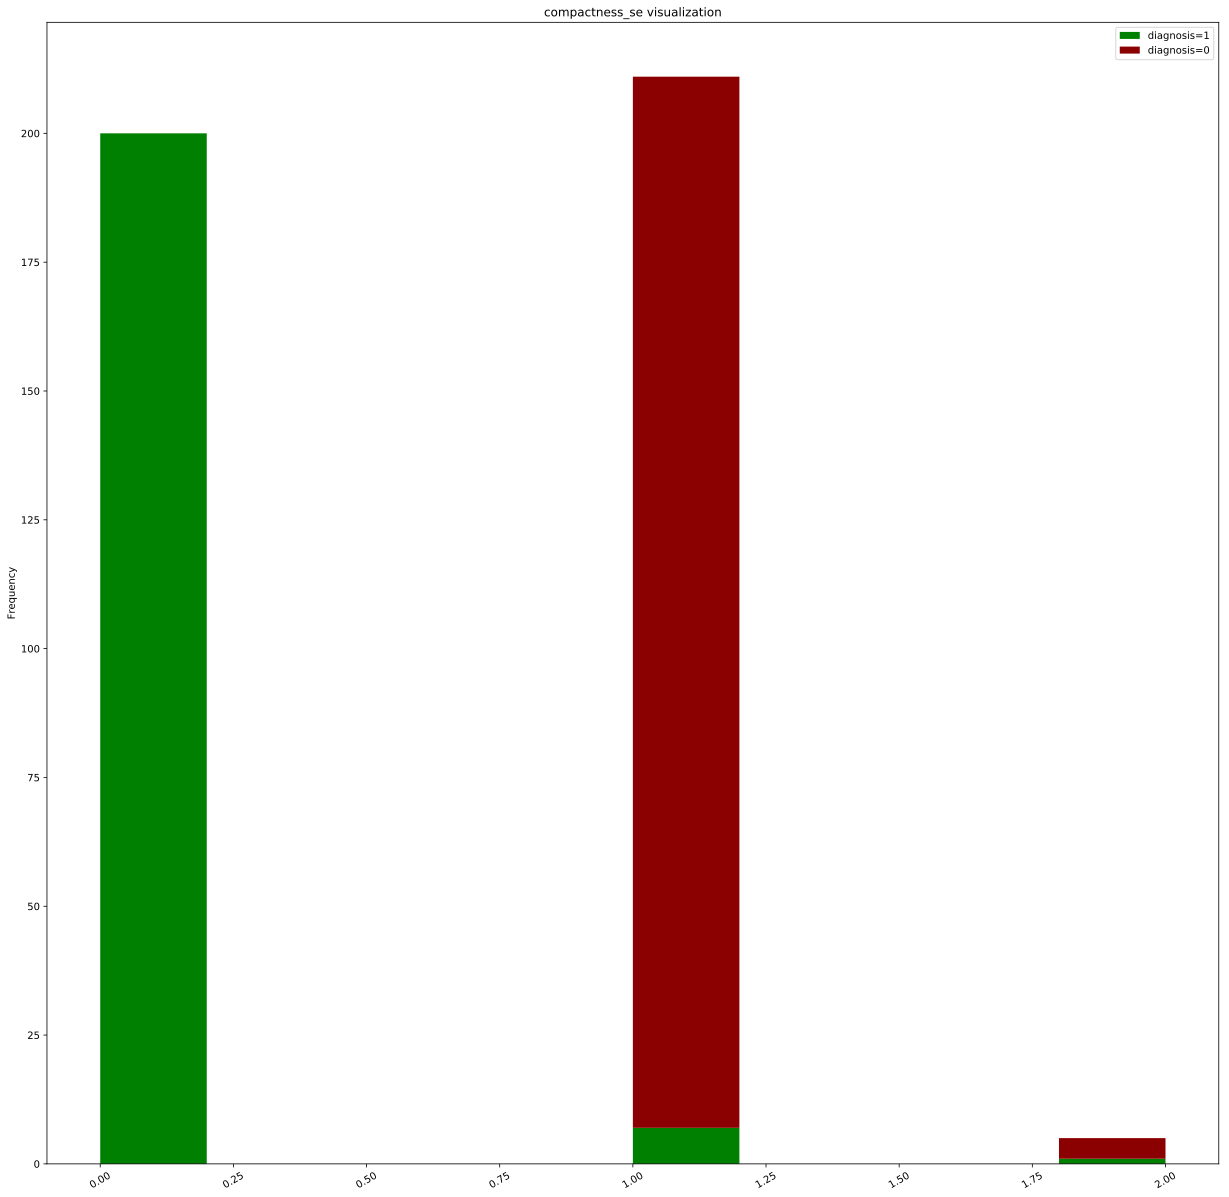

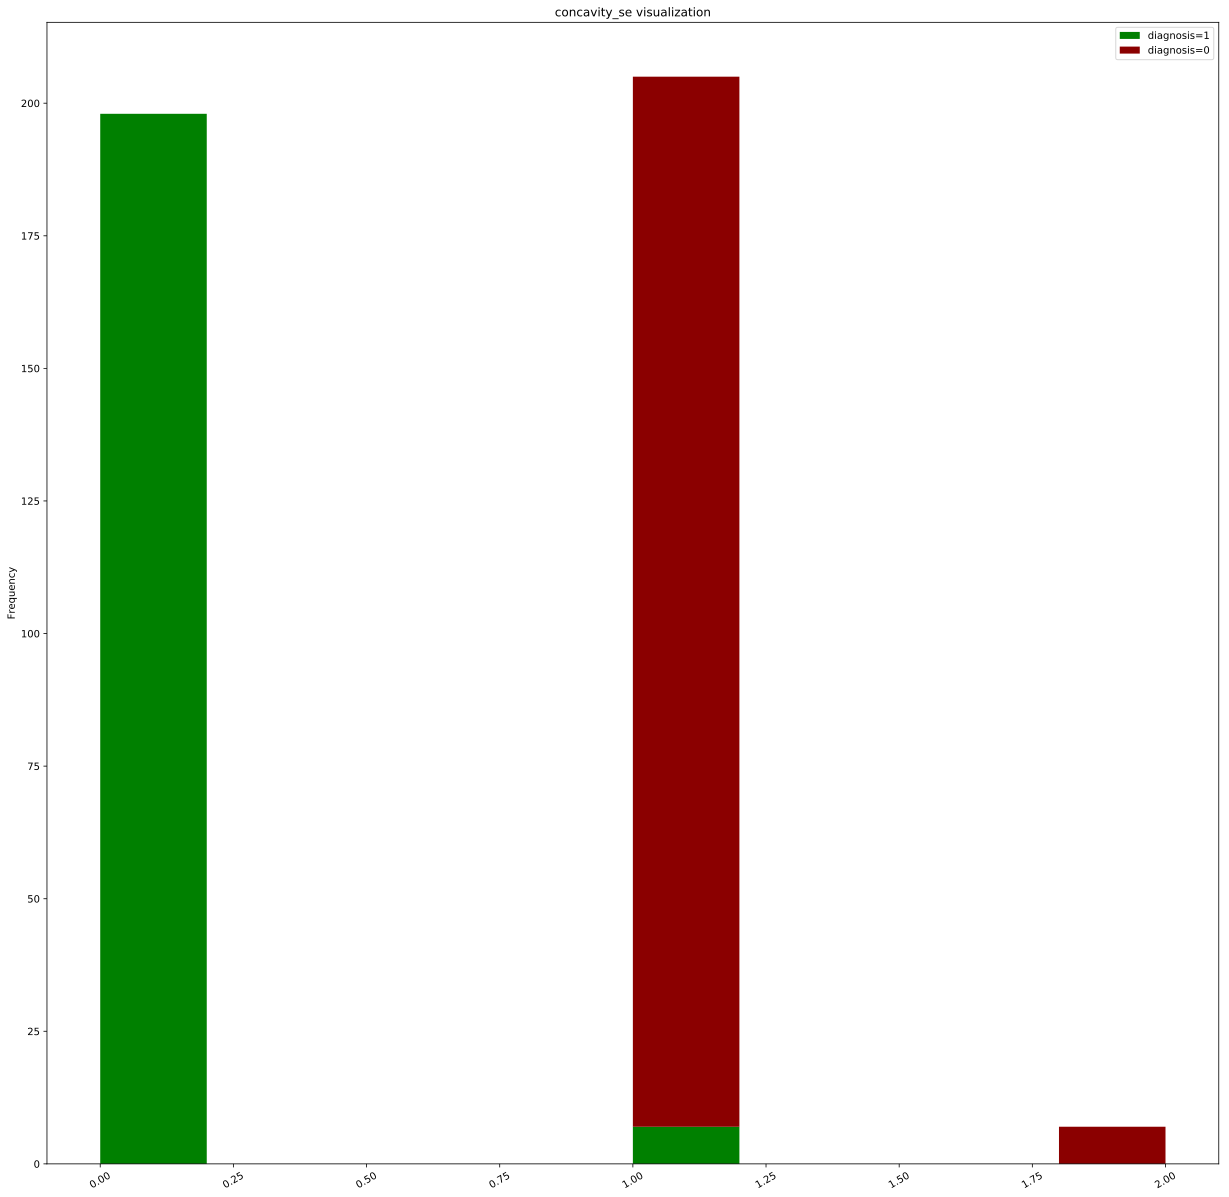

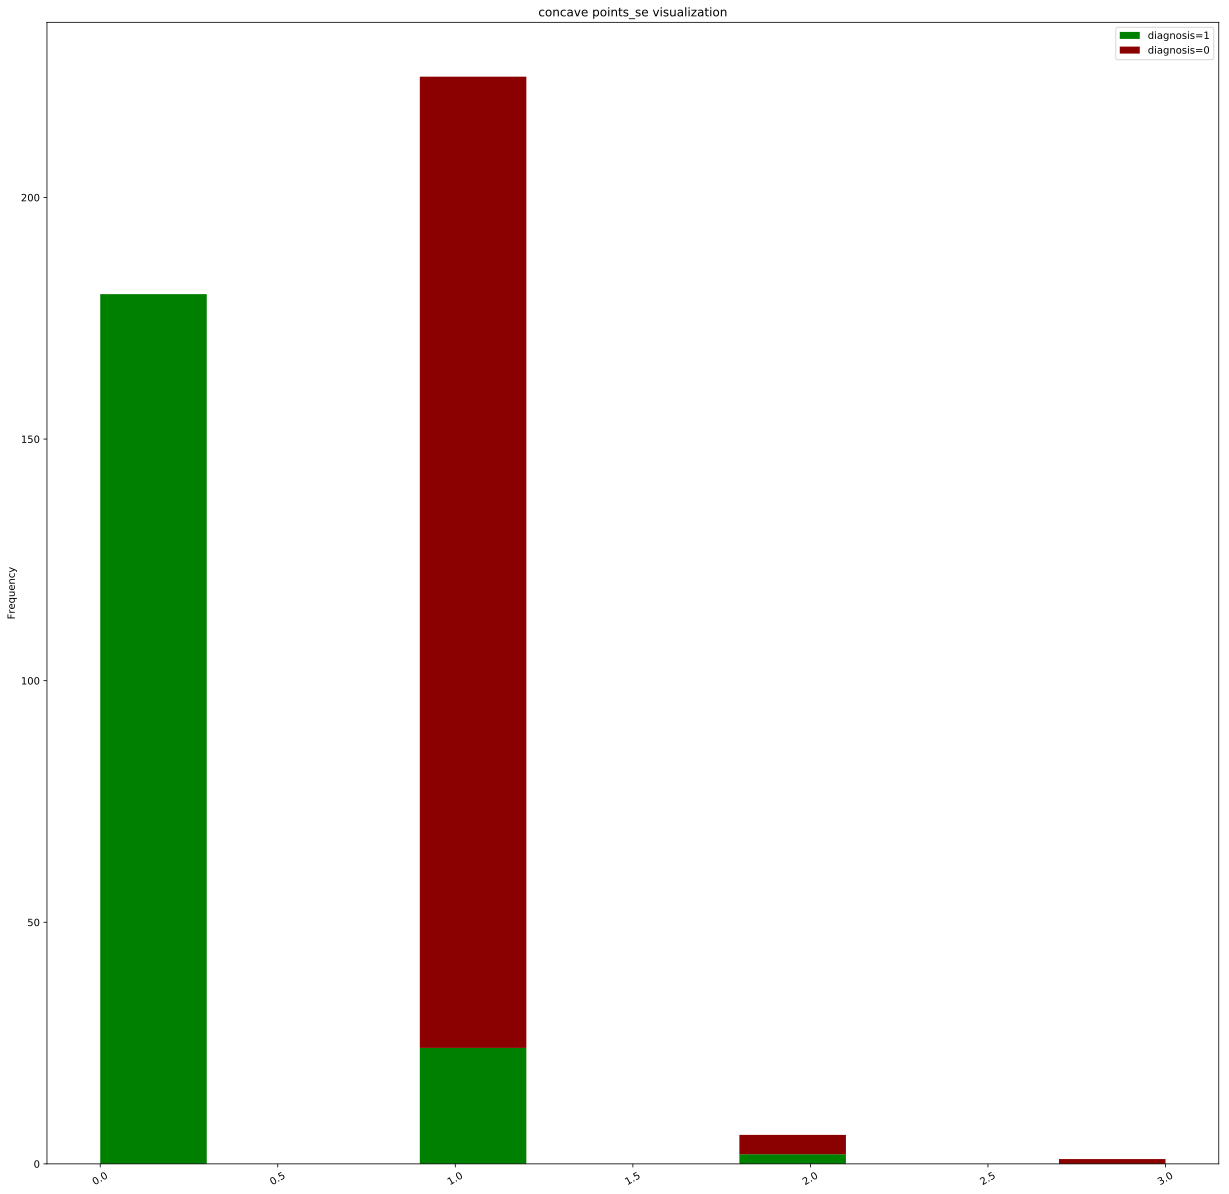

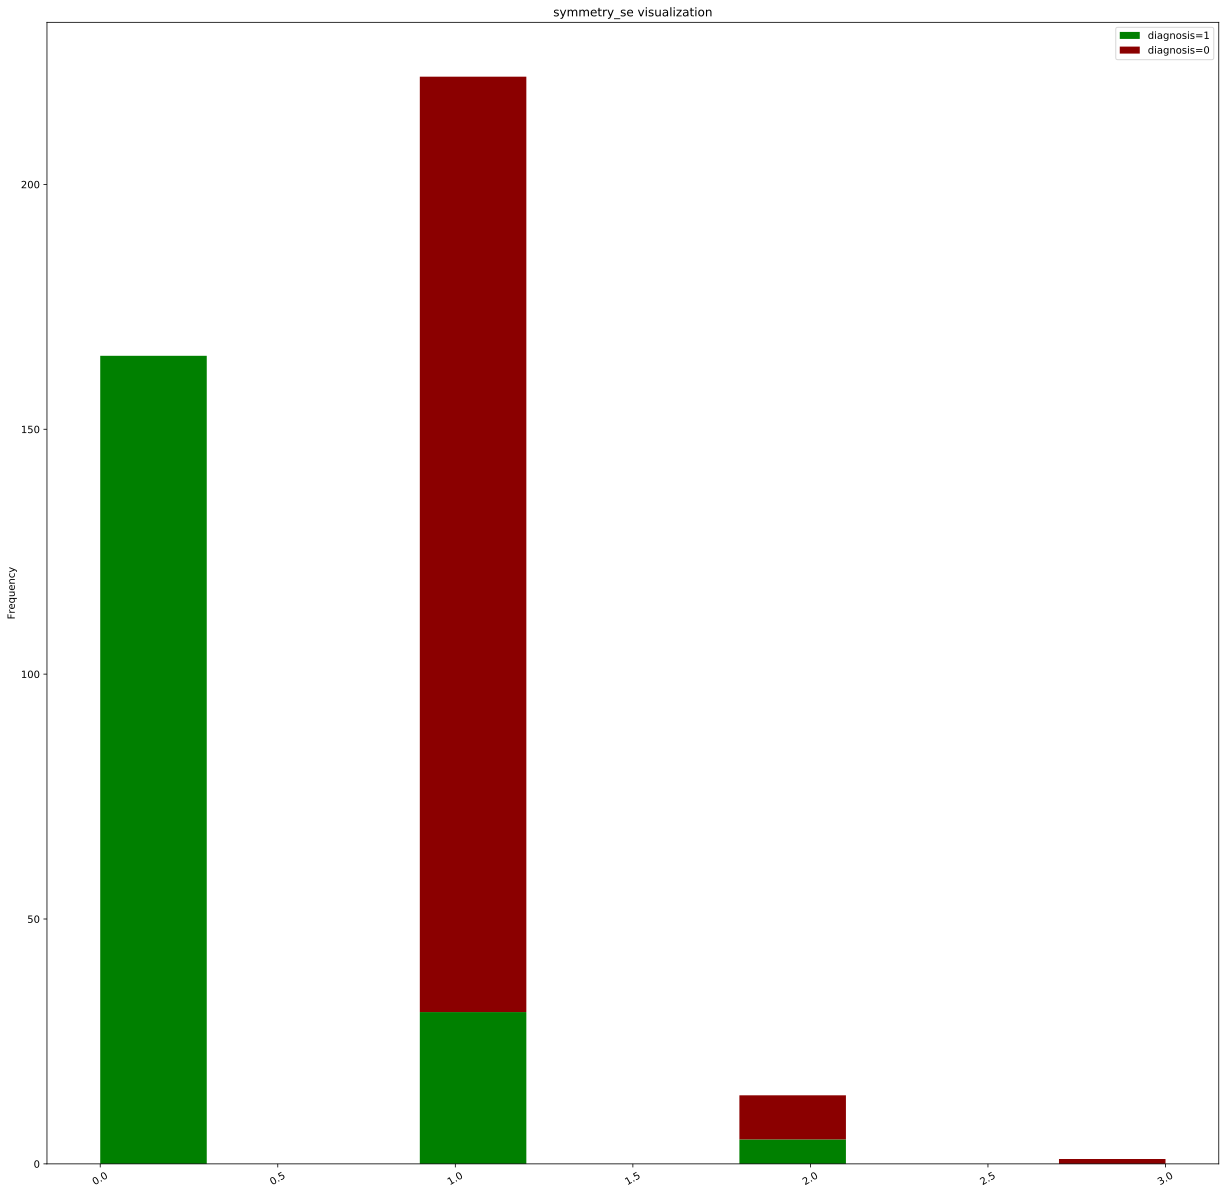

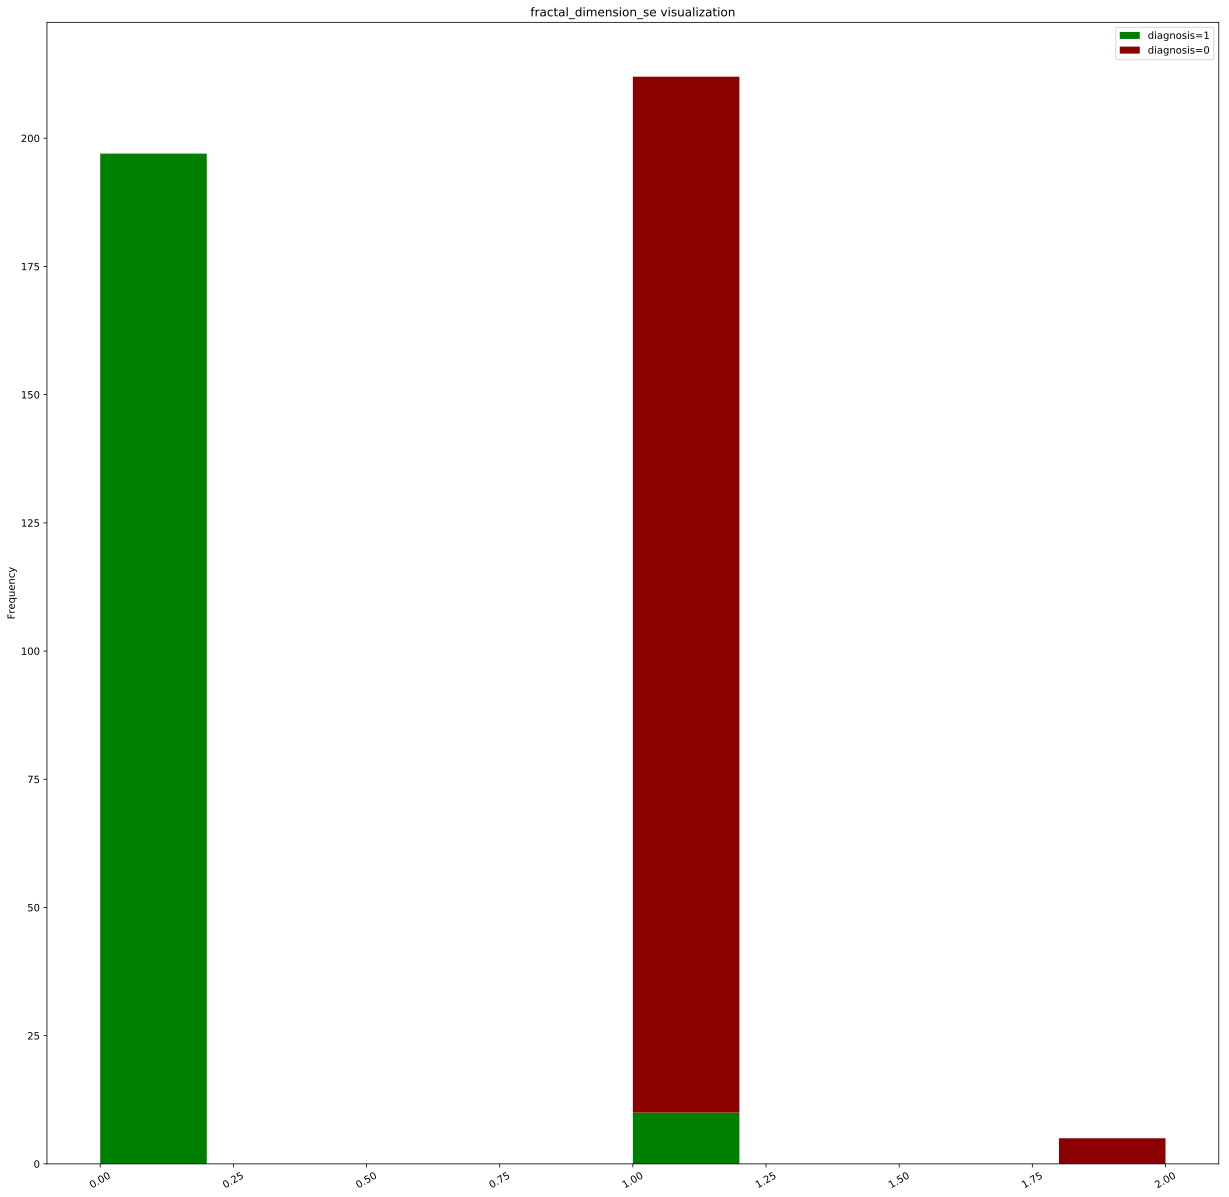

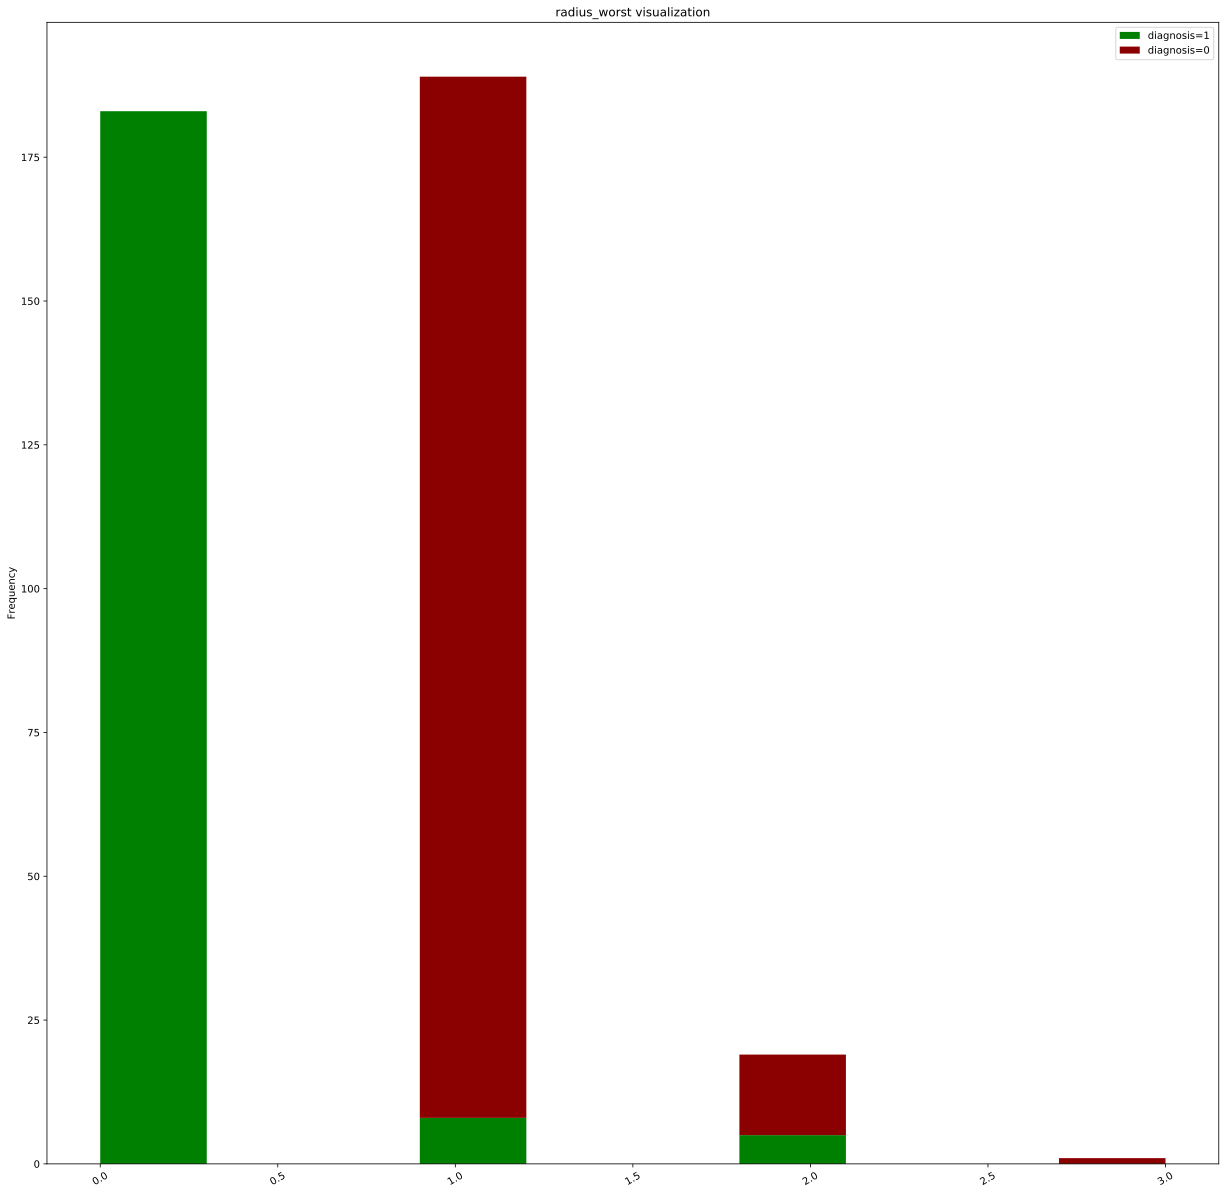

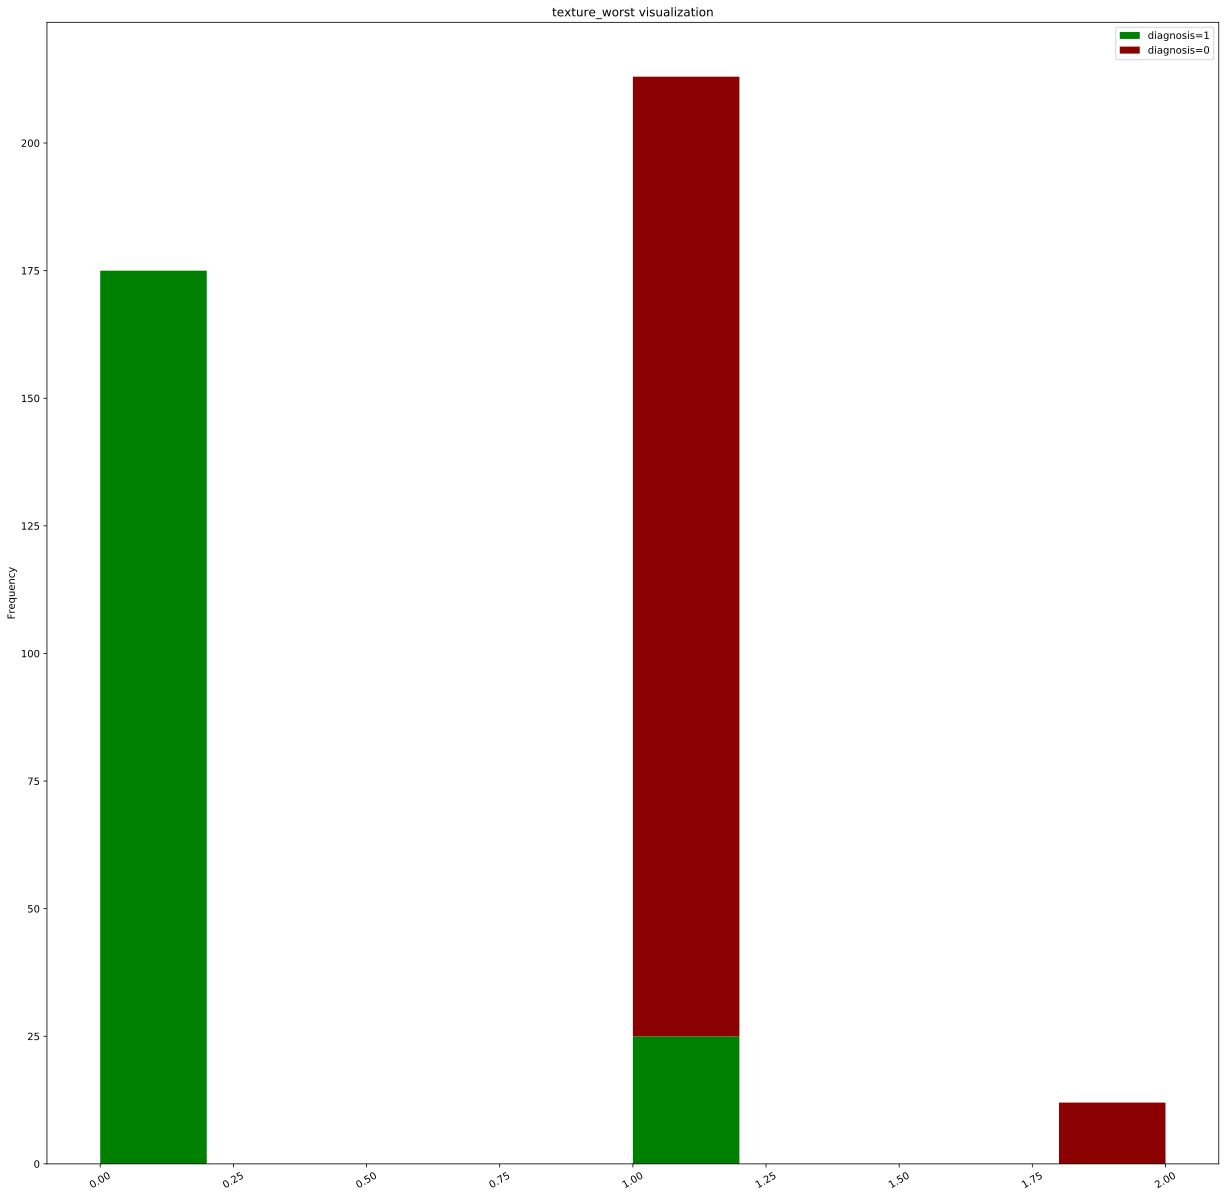

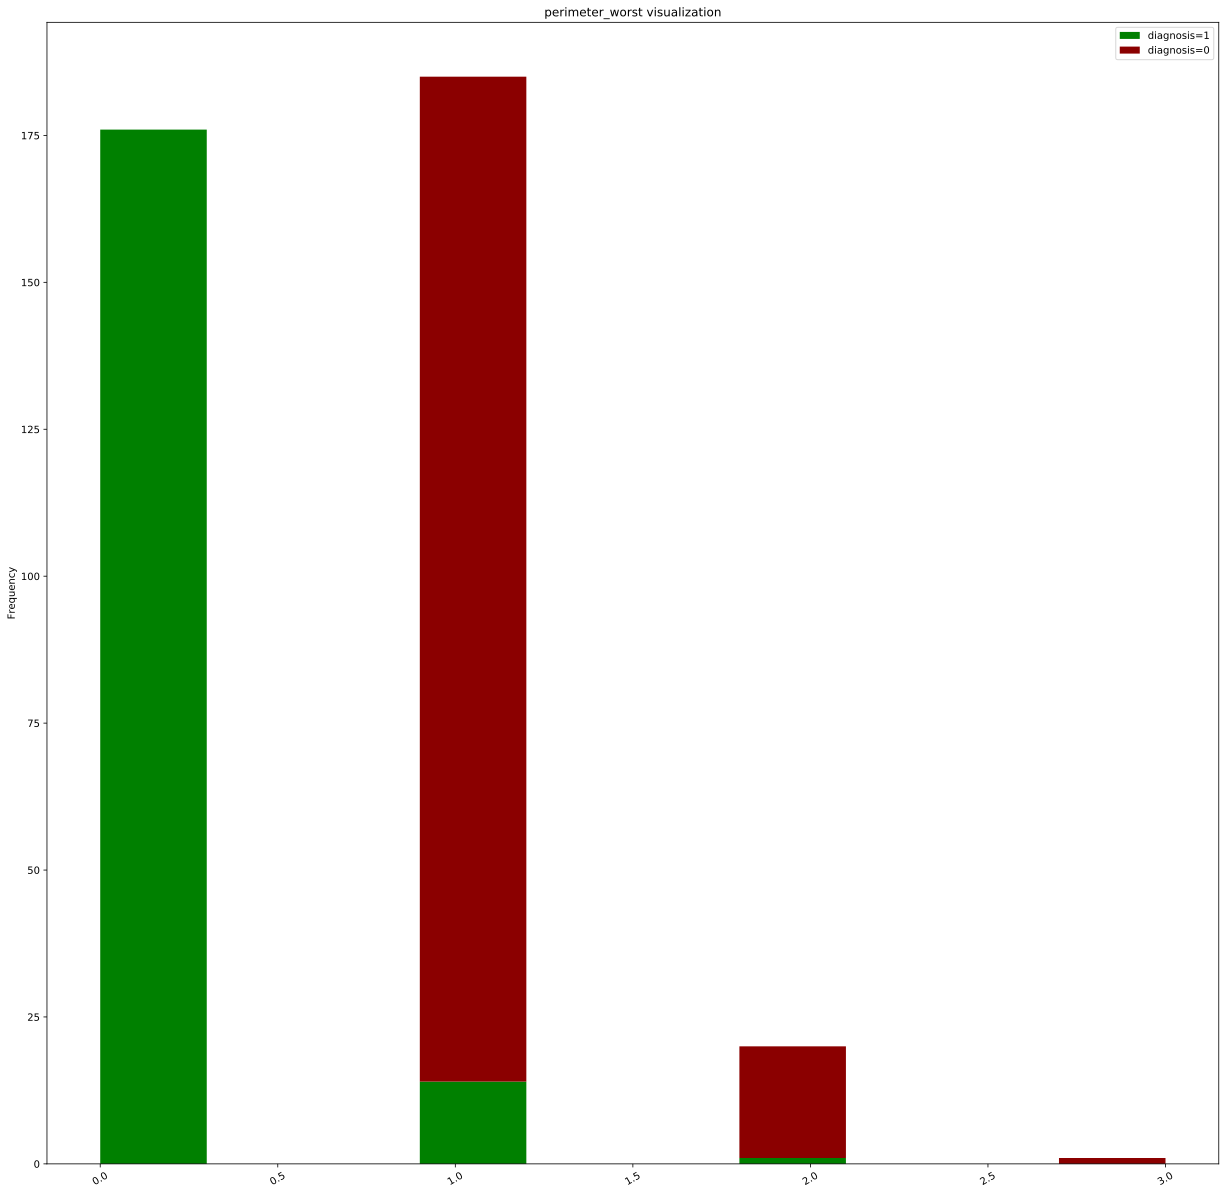

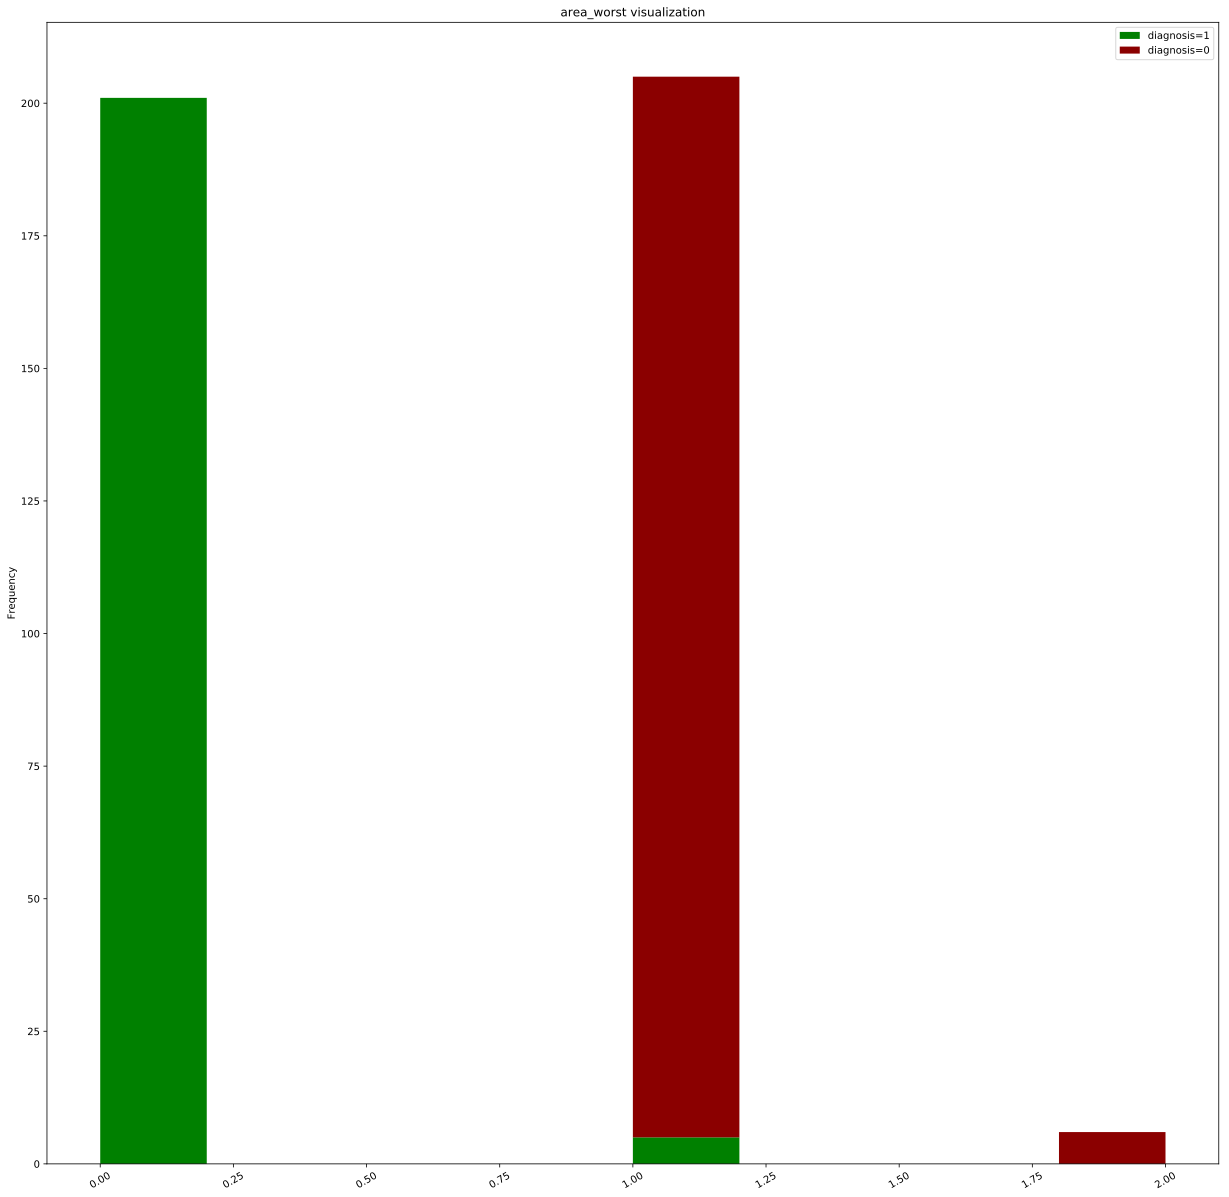

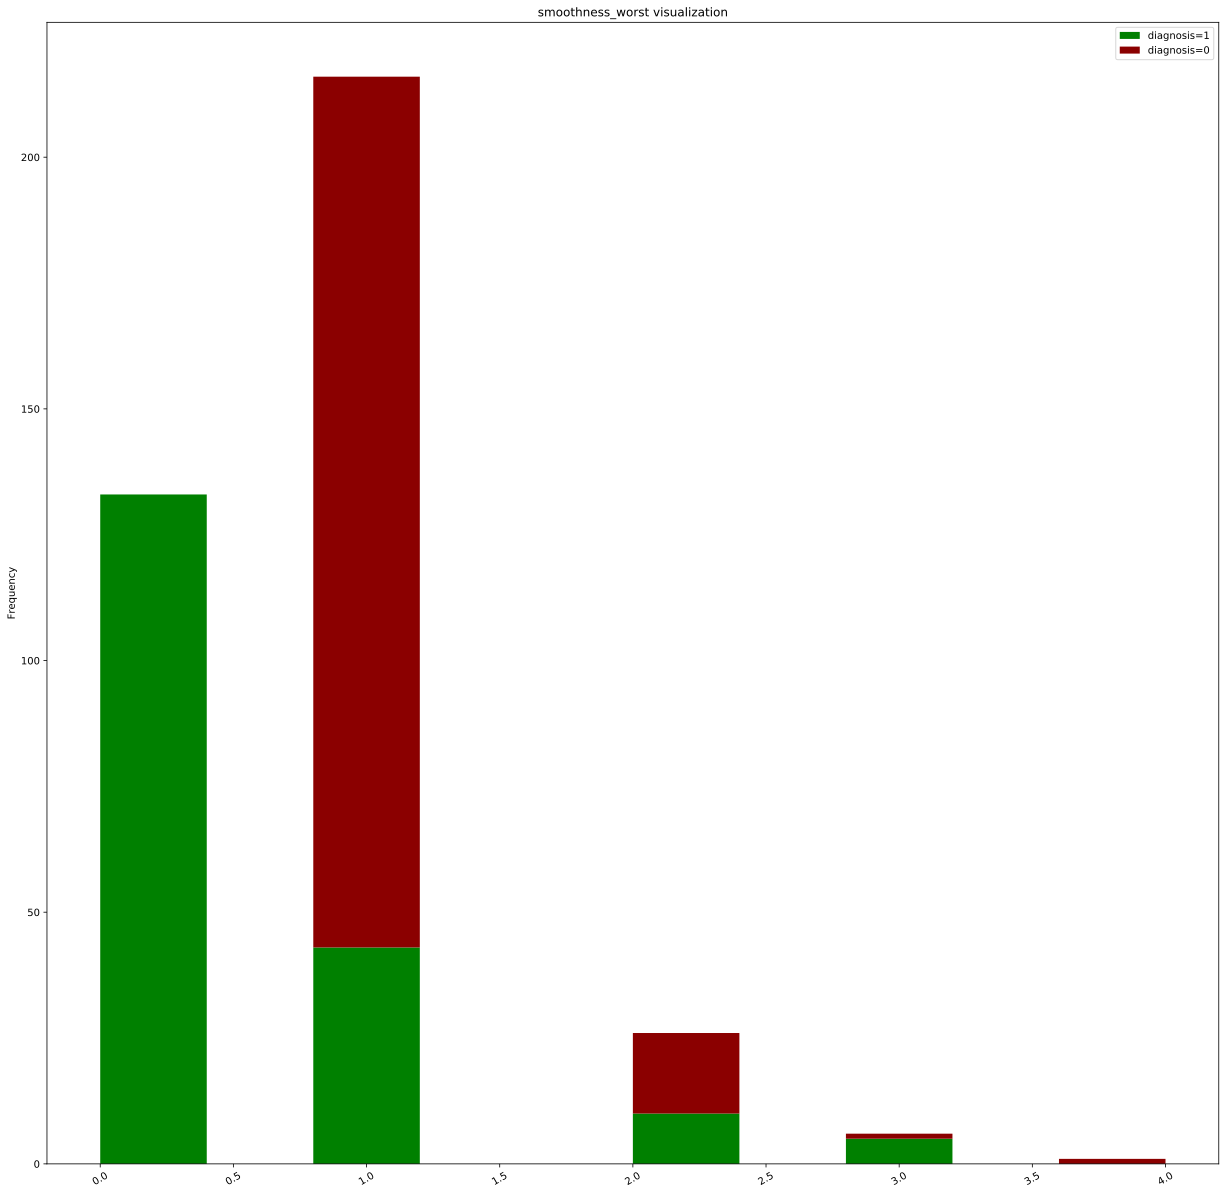

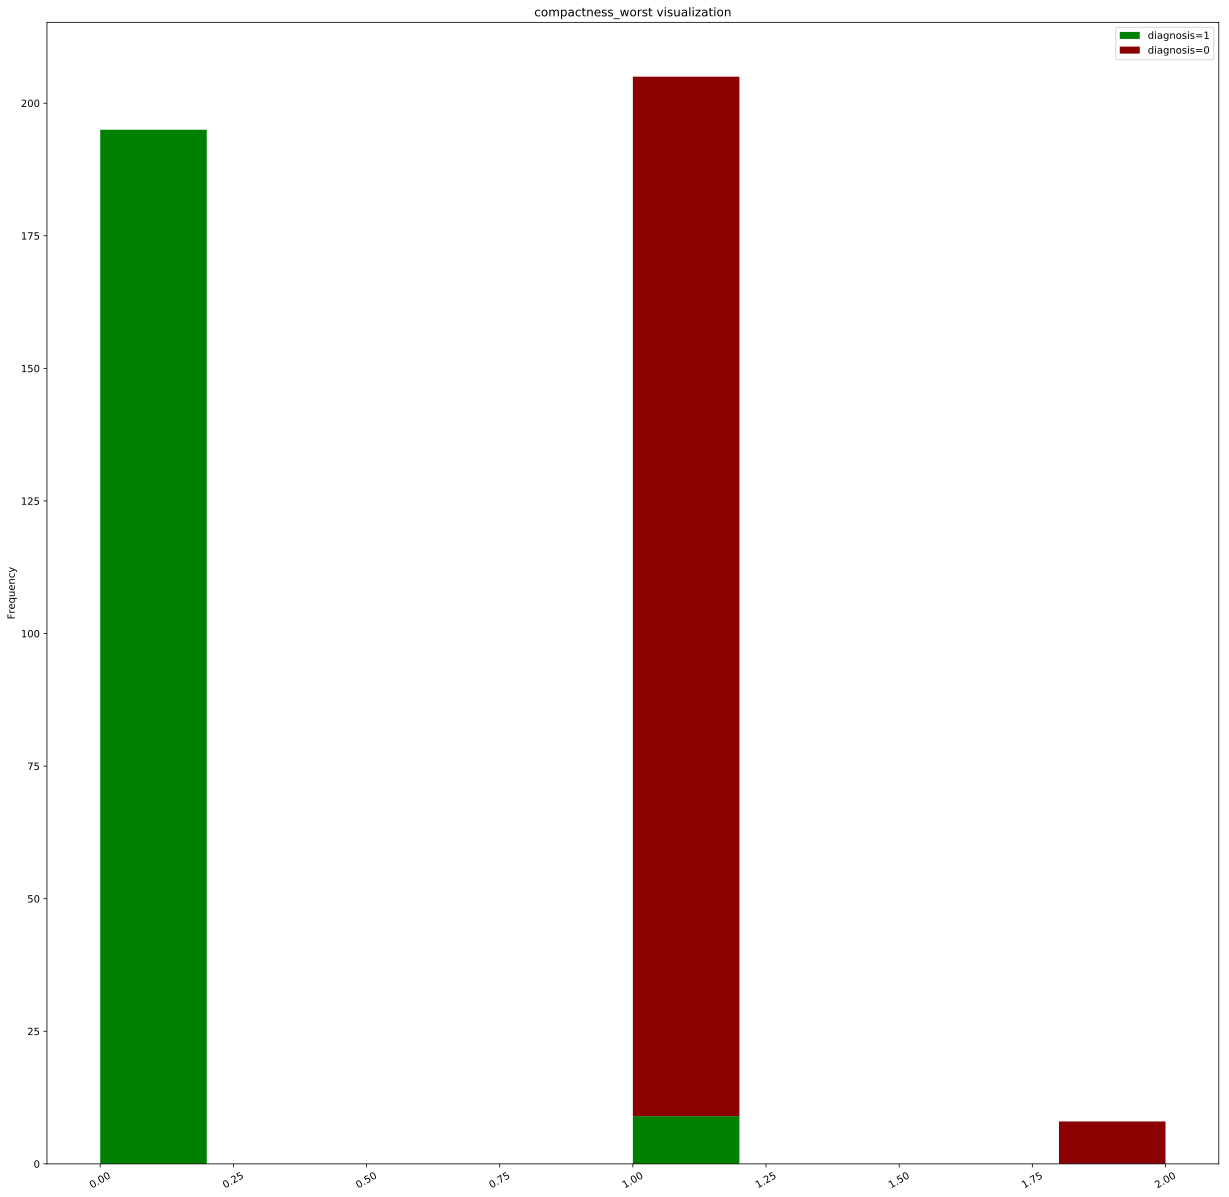

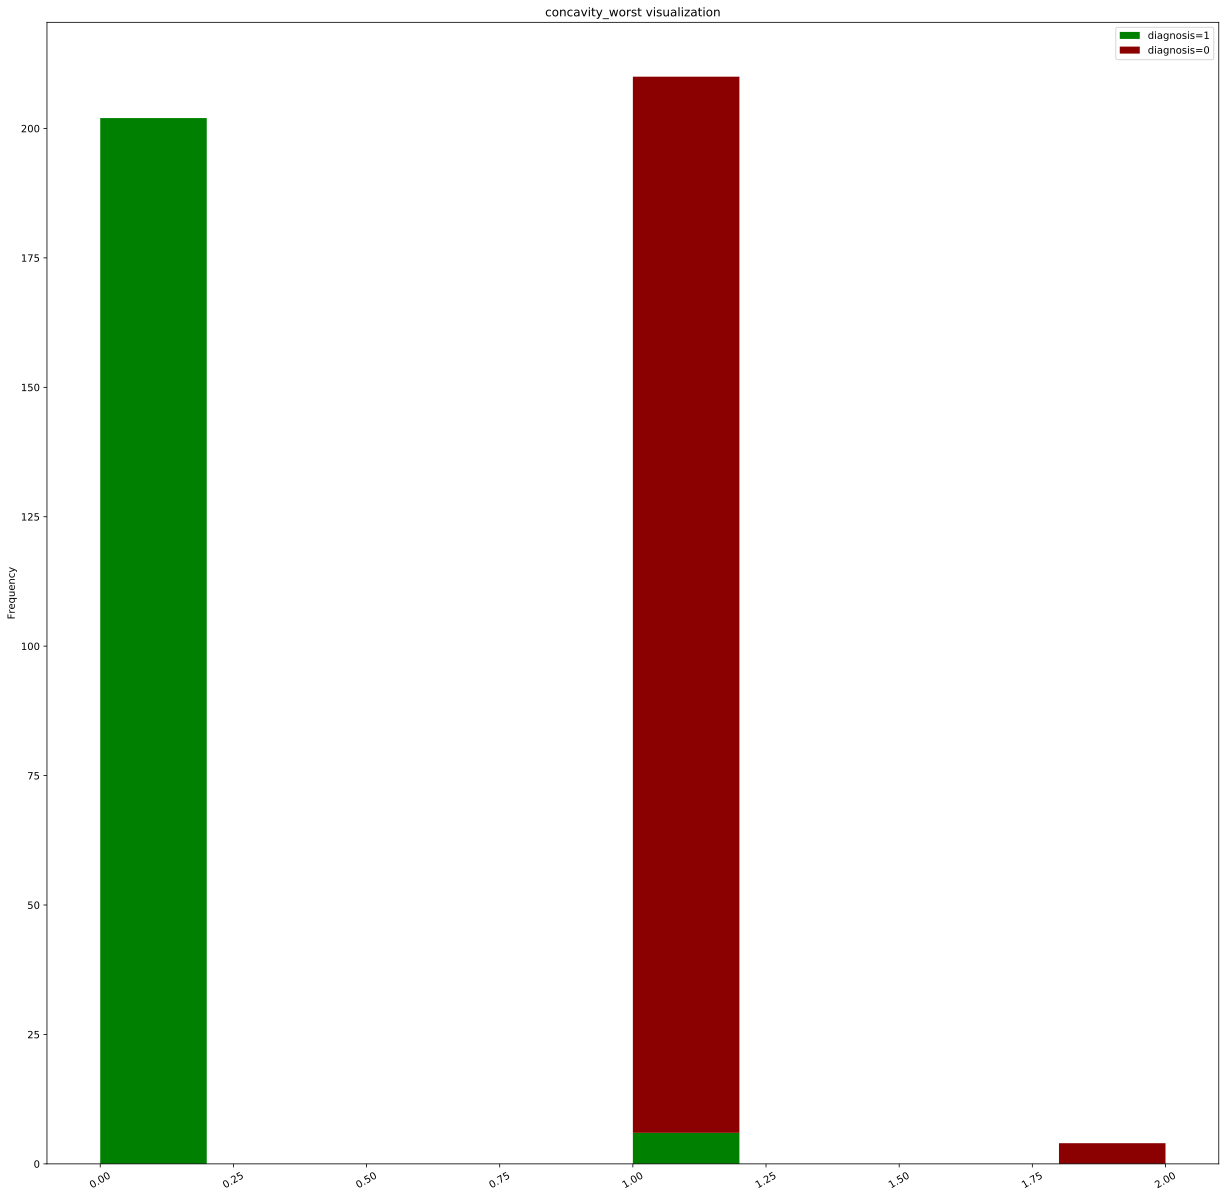

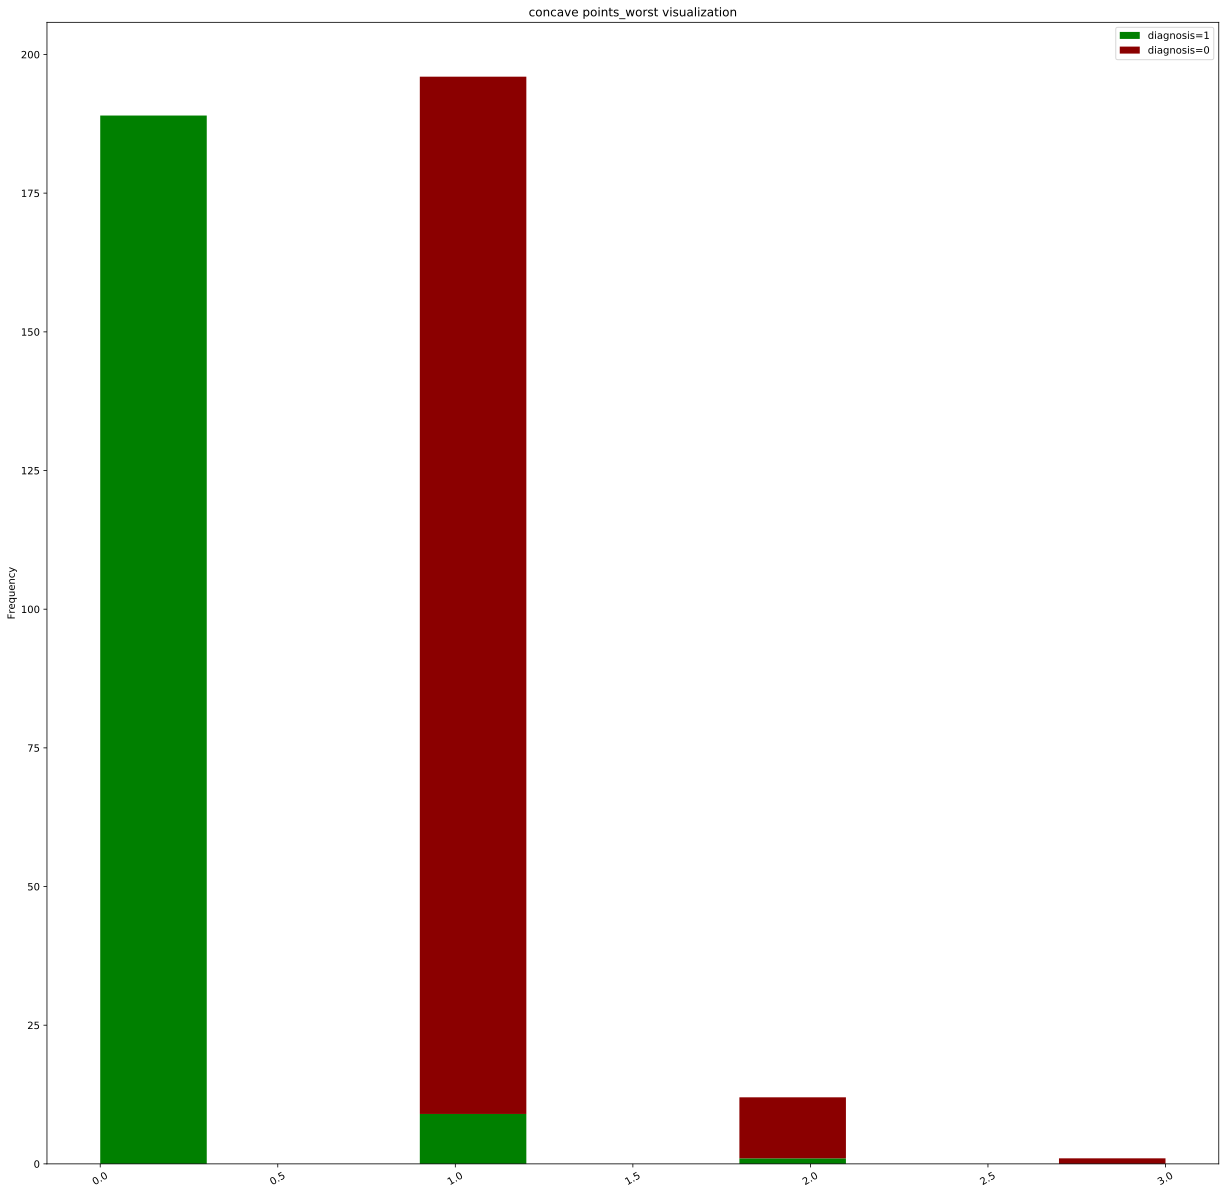

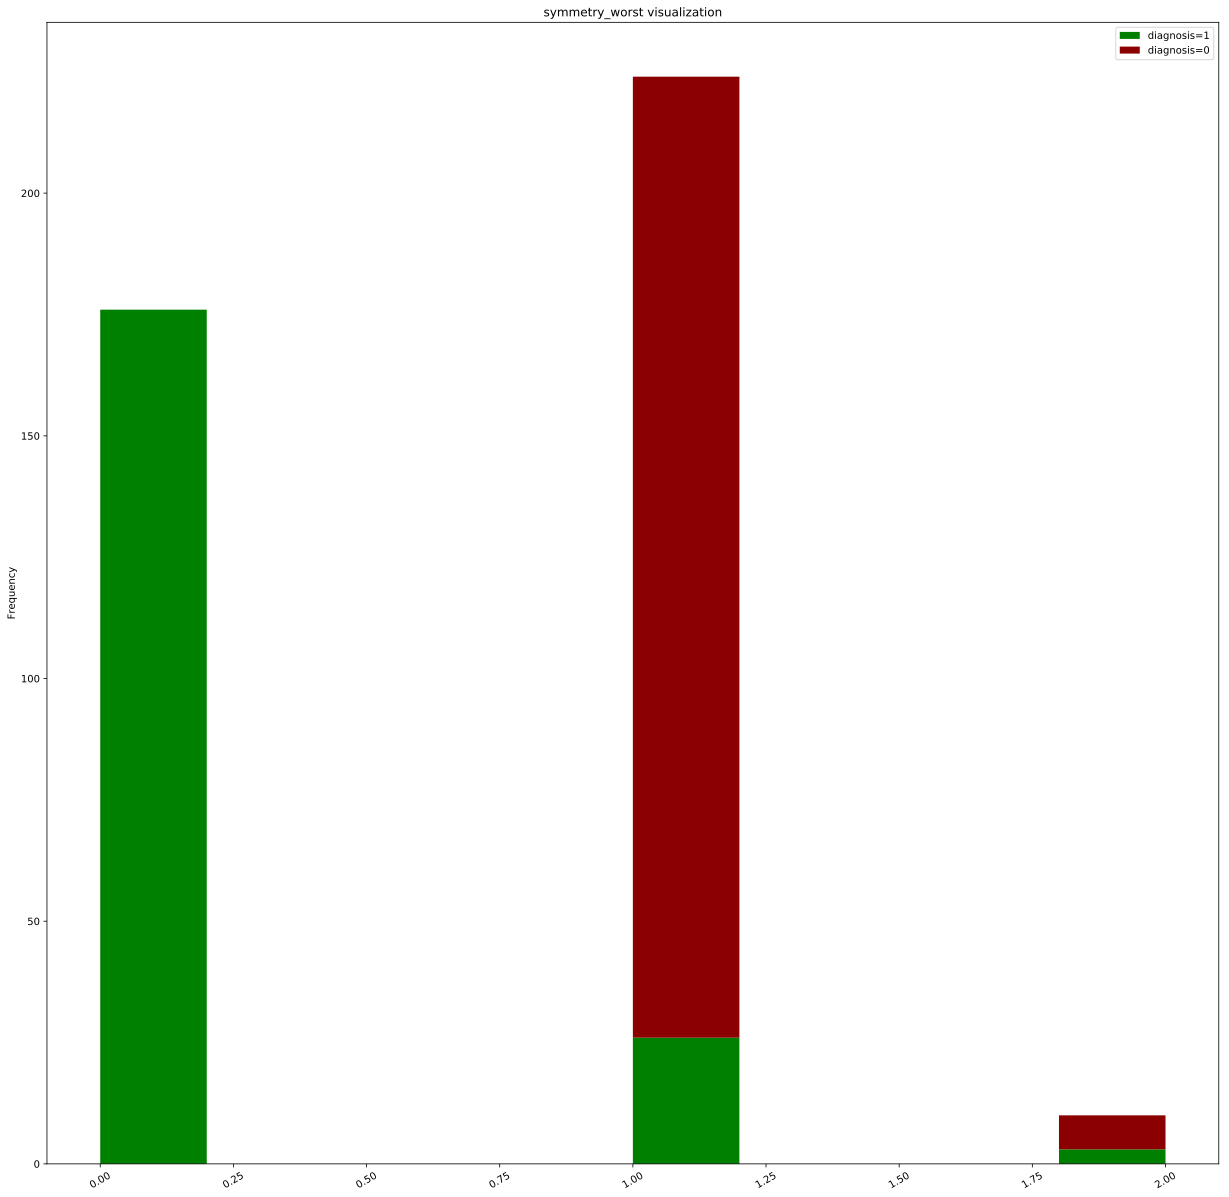

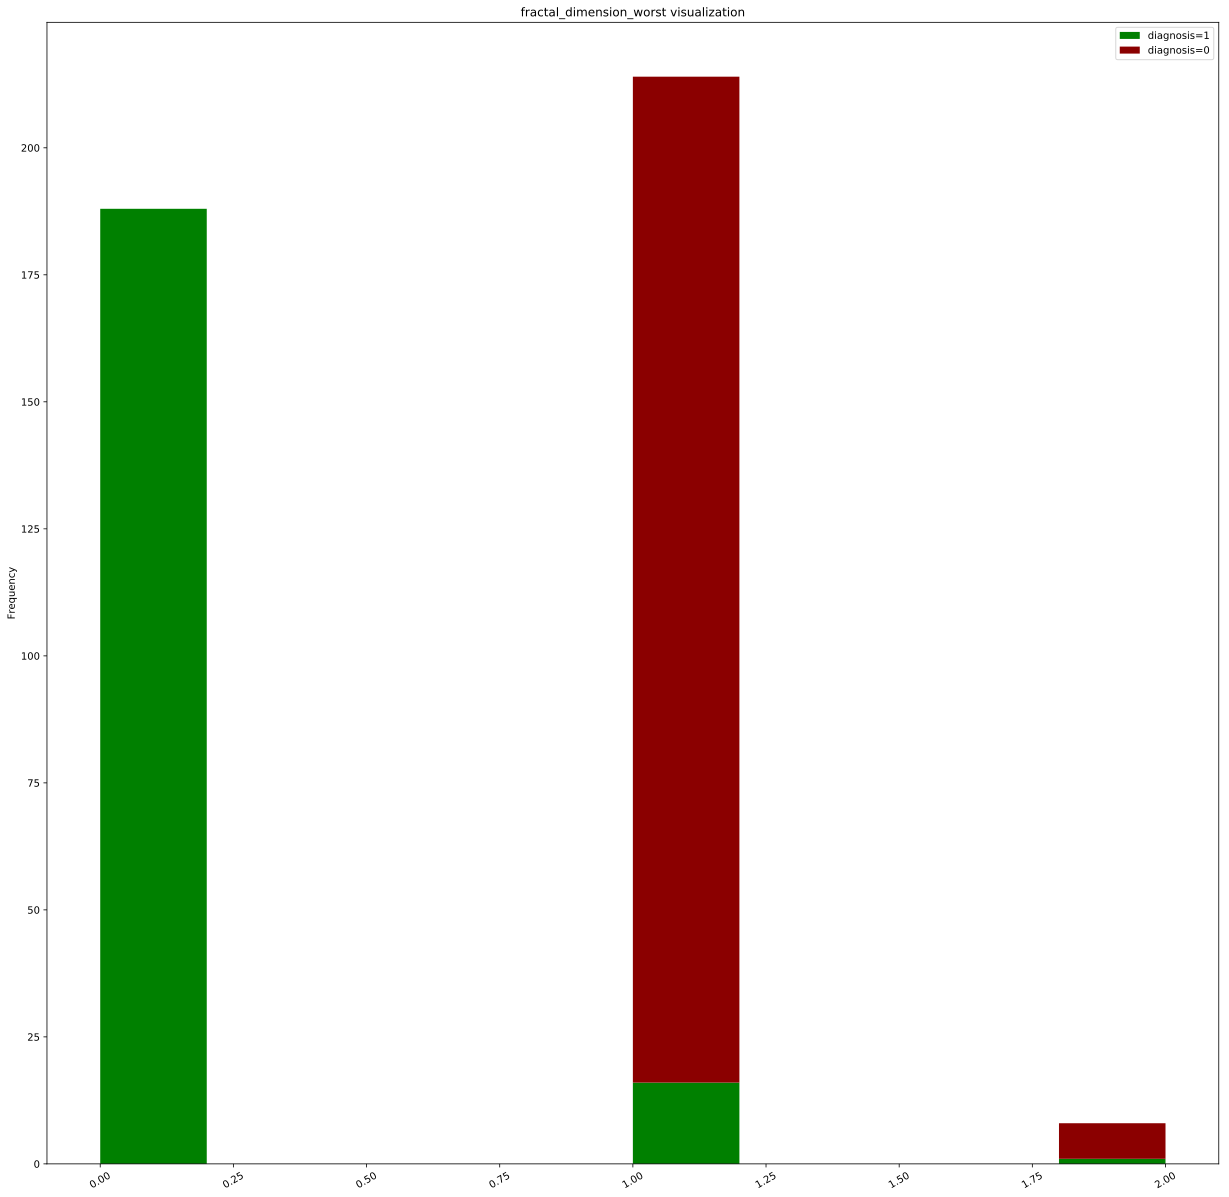

In [18]:
for i in range(2, 32):
    plot = plot_vis(allData, col=allData.columns[i], Normalized=False, kind='hist', variable='diagnosis', colors=['green', 'darkred'])

Видно, что как и в случае с корр. матрицей, что при увеличении значения параметров, шанс рака увеличивается.

**6. С помощью статистических методов проверить взаимосвязи между переменными.**

Можно проверить некоторые взаимосвязи с помощью t-test метода.

**6.1. Проверим гипотезу, например, $$H_0: M_{texture\_mean\_0} = M_{texture\_mean\_1}$$**

In [19]:
from scipy import stats

In [20]:
allData_texture_mean_0 = allData[allData['diagnosis']==0]['texture_mean']
allData_texture_mean_1 = allData[allData['diagnosis']==1]['texture_mean']

In [21]:
stats.ttest_ind(allData_texture_mean_0, allData_texture_mean_1)

Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

**p-value < 0.05, соответственно, можно отвергнуть данную гипотезу.**

Аналогично, это можно проверить для некоторых других параметров.

**6.2. Проверим гипотезу: $$H_0: M_{symmetry\_mean\_0} = M_{symmetry\_mean\_1}$$**

In [22]:
allData_symmetry_mean_0 = allData[allData['diagnosis']==0]['symmetry_mean']
allData_symmetry_mean_1 = allData[allData['diagnosis']==1]['symmetry_mean']

In [23]:
stats.ttest_ind(allData_symmetry_mean_0, allData_symmetry_mean_1)

Ttest_indResult(statistic=8.338311789592808, pvalue=5.733384028466827e-16)

**p-value < 0.05, соответственно, можно отвергнуть данную гипотезу.**

**6.3. Проверим гипотезу: $$H_0: M_{symmetry\_se\_0} = M_{symmetry\_se\_1}$$**

In [24]:
allData_symmetry_se_0 = allData[allData['diagnosis']==0]['symmetry_se']
allData_symmetry_se_1 = allData[allData['diagnosis']==1]['symmetry_se']

In [25]:
stats.ttest_ind(allData_symmetry_se_0, allData_symmetry_se_1)

Ttest_indResult(statistic=-0.1552978000059369, pvalue=0.8766418183858812)

**p-value > 0.05, соответственно, можно не отвергать данную гипотезу. Предполагаем, что параметр symmetry_se просто не влияет на целевую переменую.**

**7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?**

В нашем датасете отсутствуют как категориальные переменные, так и размерность данных достаточно маленькая. Как мне кажется для начала можно обучать модель уже на имеющихся данных, так как они действительно чистые.

Но в другом случае, когда у нас имеются категориальные переменные, нам потребуется генерировать новые переменные, а затем с помощью pca, Ridge/Lasso-регрессии можно уменьшать размерность данных. 

**8. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.**

Будем использовать градиентный бустинг и линейную регрессию.

**9. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall.**

Для этого мы будем использовать метод cross_validate().

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost
from sklearn.linear_model import LogisticRegression, Ridge, Lasso

In [27]:
X_train = allData.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y_train = allData['diagnosis']

In [28]:
clf = LogisticRegression()
clf.fit(X=X_train, y=y_train)
y_train_predict = clf.predict_proba(X_train)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 2))

Train:  0.99


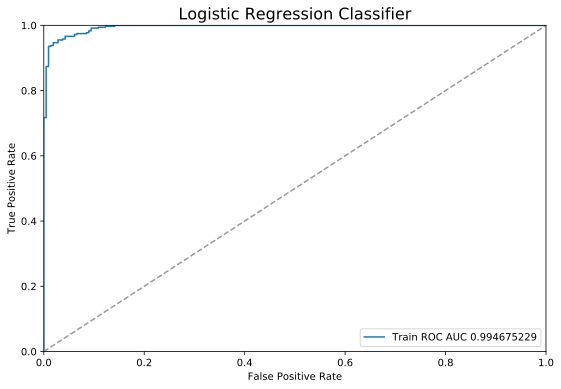

In [29]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
rcParams['figure.figsize'] = 9,6
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [30]:
scores = cross_validate(
    clf, X_train, y_train, cv=5, scoring=('roc_auc', 'accuracy', 'f1', 'precision'), return_train_score=True
)
scores

{'fit_time': array([0.00498605, 0.00498605, 0.0069809 , 0.00598288, 0.00598311]),
 'score_time': array([0.00199485, 0.00199509, 0.00199509, 0.0019958 , 0.00199485]),
 'test_accuracy': array([0.93043478, 0.93913043, 0.97345133, 0.94690265, 0.96460177]),
 'test_f1': array([0.94666667, 0.95238095, 0.97902098, 0.95774648, 0.97142857]),
 'test_precision': array([0.91025641, 0.93333333, 0.97222222, 0.95774648, 0.98550725]),
 'test_roc_auc': array([0.99386305, 0.99192506, 0.99731724, 0.98256204, 0.99664655]),
 'train_accuracy': array([0.96035242, 0.96255507, 0.9495614 , 0.96710526, 0.95394737]),
 'train_f1': array([0.96864111, 0.97033159, 0.96013865, 0.97400347, 0.96347826]),
 'train_precision': array([0.96193772, 0.96527778, 0.95189003, 0.96563574, 0.95847751]),
 'train_roc_auc': array([0.99412436, 0.99518322, 0.99397367, 0.99623612, 0.99426162])}

(array([173.,  11.,  12.,   5.,   6.,   5.,   7.,   8.,  26., 316.]),
 array([1.06440579e-48, 9.99995983e-02, 1.99999197e-01, 2.99998795e-01,
        3.99998393e-01, 4.99997992e-01, 5.99997590e-01, 6.99997188e-01,
        7.99996787e-01, 8.99996385e-01, 9.99995983e-01]),
 <a list of 10 Patch objects>)

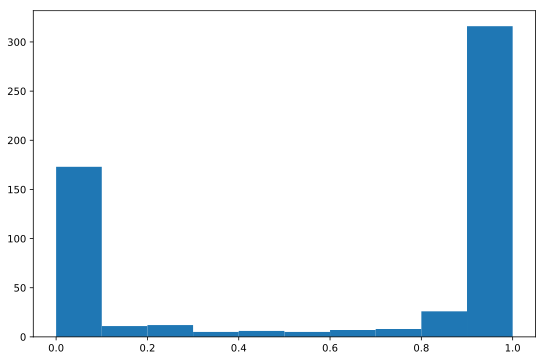

In [31]:
plt.hist(y_train_predict)

Аналогично, для xgboost.

In [32]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)

xgb.fit(X_train, y_train)
y_train_predict = xgb.predict_proba(X_train)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 4))

Train:  1.0


(array([207.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   2., 355.]),
 array([7.73209496e-04, 1.00642823e-01, 2.00512436e-01, 3.00382049e-01,
        4.00251662e-01, 5.00121275e-01, 5.99990888e-01, 6.99860501e-01,
        7.99730114e-01, 8.99599727e-01, 9.99469340e-01]),
 <a list of 10 Patch objects>)

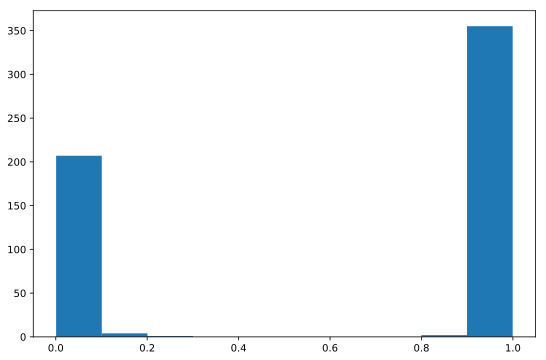

In [33]:
plt.hist(y_train_predict)

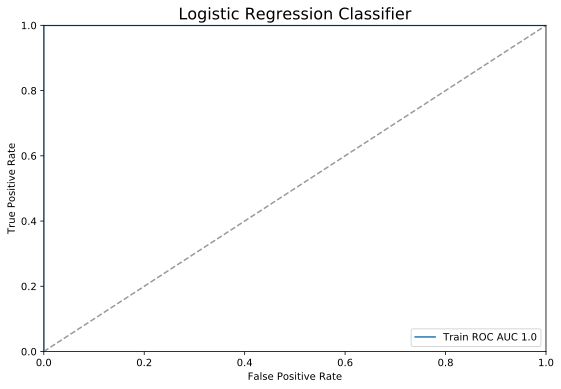

In [34]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
rcParams['figure.figsize'] = 9,6
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [35]:
scores = cross_validate(
    clf, X_train, y_train, cv=5, scoring=('roc_auc', 'accuracy', 'f1', 'precision'), return_train_score=True
)
scores

{'fit_time': array([0.00598311, 0.00498605, 0.00598311, 0.00498605, 0.00698161]),
 'score_time': array([0.00299239, 0.00199509, 0.00099754, 0.00199533, 0.00299025]),
 'test_accuracy': array([0.93043478, 0.93913043, 0.97345133, 0.94690265, 0.96460177]),
 'test_f1': array([0.94666667, 0.95238095, 0.97902098, 0.95774648, 0.97142857]),
 'test_precision': array([0.91025641, 0.93333333, 0.97222222, 0.95774648, 0.98550725]),
 'test_roc_auc': array([0.99386305, 0.99192506, 0.99731724, 0.98256204, 0.99664655]),
 'train_accuracy': array([0.96035242, 0.96255507, 0.9495614 , 0.96710526, 0.95394737]),
 'train_f1': array([0.96864111, 0.97033159, 0.96013865, 0.97400347, 0.96347826]),
 'train_precision': array([0.96193772, 0.96527778, 0.95189003, 0.96563574, 0.95847751]),
 'train_roc_auc': array([0.99412436, 0.99518322, 0.99397367, 0.99623612, 0.99426162])}

**Будем использовать PCA для сокращения размерности данных.**

In [36]:
X = X_train.as_matrix()

from sklearn.decomposition import PCA
Pca = PCA(n_components=X.shape[1]).fit(X)
for i in range(1, X.shape[1]):
    print("n-components=%s, explained variance %.7f" % (i, sum(Pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.9820447
n-components=2, explained variance 0.9982212
n-components=3, explained variance 0.9997787
n-components=4, explained variance 0.9998996
n-components=5, explained variance 0.9999879
n-components=6, explained variance 0.9999945
n-components=7, explained variance 0.9999985
n-components=8, explained variance 0.9999994
n-components=9, explained variance 0.9999997
n-components=10, explained variance 0.9999999
n-components=11, explained variance 1.0000000
n-components=12, explained variance 1.0000000
n-components=13, explained variance 1.0000000
n-components=14, explained variance 1.0000000
n-components=15, explained variance 1.0000000
n-components=16, explained variance 1.0000000
n-components=17, explained variance 1.0000000
n-components=18, explained variance 1.0000000
n-components=19, explained variance 1.0000000
n-components=20, explained variance 1.0000000
n-components=21, explained variance 1.0000000
n-components=22, explained variance 1.00000

Видно, что уже 1 компонента объясняет 98.20 %, а 3 компоненты объясняют 99.98 % дисперсии. Таким образом, нам будет с лихвой достаточно 3-ех компонент. 

In [37]:
X_pca = pd.DataFrame(PCA(n_components=3).fit_transform(X), columns=['f1', 'f2', 'f3'])

In [38]:
X_pca.head()

,f1,f2,f3
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801


**Теперь обучим модели на X_pca.**

In [39]:
clf = LogisticRegression()
clf.fit(X=X_pca, y=y_train)
y_train_predict = clf.predict_proba(X_pca)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 2))

Train:  0.98


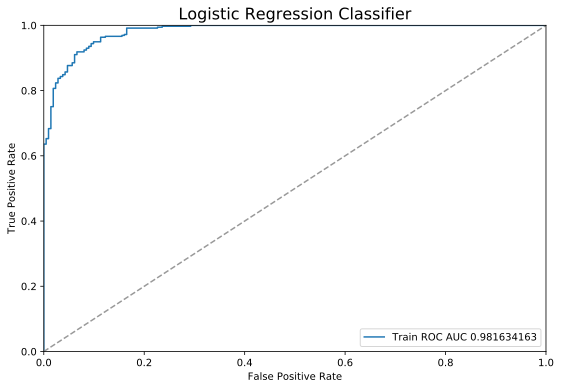

In [40]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
rcParams['figure.figsize'] = 9,6
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [41]:
scores = cross_validate(
    clf, X_pca, y_train, cv=5, scoring=('roc_auc', 'accuracy', 'f1', 'precision'), return_train_score=True
)
scores

{'fit_time': array([0.00199413, 0.00099707, 0.0009973 , 0.00199509, 0.00199461]),
 'score_time': array([0.00199437, 0.00199461, 0.00199437, 0.00199366, 0.00199461]),
 'test_accuracy': array([0.88695652, 0.93043478, 0.92035398, 0.96460177, 0.9380531 ]),
 'test_f1': array([0.91612903, 0.94520548, 0.93793103, 0.97222222, 0.95035461]),
 'test_precision': array([0.85542169, 0.93243243, 0.91891892, 0.95890411, 0.95714286]),
 'test_roc_auc': array([0.9744832 , 0.98675711, 0.98658618, 0.97686117, 0.9778672 ]),
 'train_accuracy': array([0.9339207 , 0.92290749, 0.93640351, 0.92105263, 0.93201754]),
 'train_f1': array([0.94809689, 0.94017094, 0.95025729, 0.93856655, 0.94700855]),
 'train_precision': array([0.93515358, 0.91666667, 0.93265993, 0.91666667, 0.9264214 ]),
 'train_roc_auc': array([0.98399253, 0.98015156, 0.97980255, 0.98126285, 0.98245578])}

(array([161.,  10.,   8.,   9.,  10.,   9.,  13.,  16.,  34., 299.]),
 array([1.67941118e-30, 9.98949806e-02, 1.99789961e-01, 2.99684942e-01,
        3.99579923e-01, 4.99474903e-01, 5.99369884e-01, 6.99264865e-01,
        7.99159845e-01, 8.99054826e-01, 9.98949806e-01]),
 <a list of 10 Patch objects>)

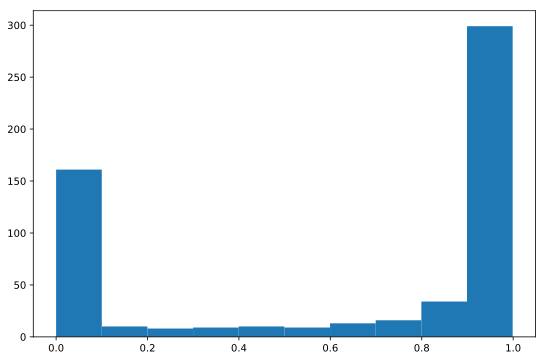

In [42]:
plt.hist(y_train_predict)

In [43]:
xgb = xgboost.XGBClassifier(max_depth=5, n_jobs=-1)

xgb.fit(X_pca, y_train)
y_train_predict = xgb.predict_proba(X_pca)[:, 1]
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 9)
print("Train: ", round(roc_auc_train, 4))

Train:  0.9999


(array([182.,  13.,   6.,   6.,   4.,   3.,   3.,   5.,  22., 325.]),
 array([0.00121499, 0.10097336, 0.20073173, 0.30049011, 0.40024848,
        0.50000686, 0.59976523, 0.69952361, 0.79928198, 0.89904035,
        0.99879873]),
 <a list of 10 Patch objects>)

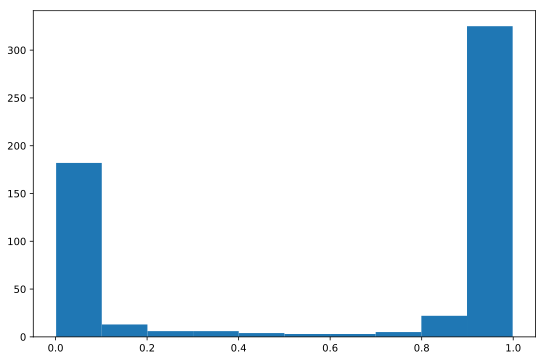

In [44]:
plt.hist(y_train_predict)

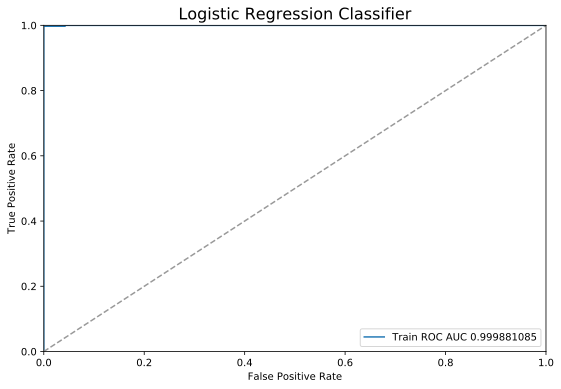

In [45]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
rcParams['figure.figsize'] = 9,6
plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

In [46]:
scores = cross_validate(
    clf, X_pca, y_train, cv=5, scoring=('roc_auc', 'accuracy', 'f1', 'precision'), return_train_score=True
)
scores

{'fit_time': array([0.00199413, 0.00201488, 0.00196671, 0.00199437, 0.0009973 ]),
 'score_time': array([0.00299239, 0.00200105, 0.00202155, 0.0009973 , 0.00196886]),
 'test_accuracy': array([0.88695652, 0.93043478, 0.92035398, 0.96460177, 0.9380531 ]),
 'test_f1': array([0.91612903, 0.94520548, 0.93793103, 0.97222222, 0.95035461]),
 'test_precision': array([0.85542169, 0.93243243, 0.91891892, 0.95890411, 0.95714286]),
 'test_roc_auc': array([0.9744832 , 0.98675711, 0.98658618, 0.97686117, 0.9778672 ]),
 'train_accuracy': array([0.9339207 , 0.92290749, 0.93640351, 0.92105263, 0.93201754]),
 'train_f1': array([0.94809689, 0.94017094, 0.95025729, 0.93856655, 0.94700855]),
 'train_precision': array([0.93515358, 0.91666667, 0.93265993, 0.91666667, 0.9264214 ]),
 'train_roc_auc': array([0.98399253, 0.98015156, 0.97980255, 0.98126285, 0.98245578])}

In [47]:
print('Изначальный датафрейм занимает: {} байт, датафрейм после уменьшения рамерности данных занимает: {} байт'
      .format(X_train.memory_usage(index=True).sum(), X_pca.memory_usage(index=True).sum()))

Изначальный датафрейм занимает: 136640 байт, датафрейм после уменьшения рамерности данных занимает: 13736 байт


**Таким образом мы потеряли незначительно в точности, но при этом сократили количество фич в 10 раз и количество памяти, которое они занимают, также в 10 раз, что могло бы бить существенно при бОльших датасетах.**